# 1. Open File and Study Data

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import scipy.stats as st

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('games.csv')

In [6]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Section 1 Conclusions

From a quick look at the data, we can see a wide range in release years from 1980 up to 2016. We also see there are some missing critic scores and rating, which could simply be that these titles were independently released and didn't recieve critic scores or official ratings. However, we will want to look into these more closely. 

Also, there shouldn't be any games with missing release years, so we'll want to take a closer look at what might be happening there -this data should be readily available when the data was originally collected. In either case, we'll definitely have our work cut out in preprocessing. 

# 2. Prepare Data for Analysis

In [9]:
df.columns = ['name', 'platform', 'release_year', 'genre', 'sales_na', 'sales_eu', 'sales_jp', 
              'sales_other', 'crit_score', 'user_score', 'rating']

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
mapper = df.groupby('name')['release_year'].max().to_dict()

In [12]:
def fill_year(row):
    try:
        if np.isnan(row['release_year']) or row['release_year'] is None:
            return mapper[row['name']]
    except:
        return 0
    return row['release_year']

In [13]:
df['year_released'] = df.apply(fill_year, axis=1)

## Review

Your project will look better and easier to read if you add some remarks about what is happening now.

---

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name             16713 non-null object
platform         16715 non-null object
release_year     16446 non-null float64
genre            16713 non-null object
sales_na         16715 non-null float64
sales_eu         16715 non-null float64
sales_jp         16715 non-null float64
sales_other      16715 non-null float64
crit_score       8137 non-null float64
user_score       10014 non-null object
rating           9949 non-null object
year_released    16569 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


In [15]:
df = df.drop('release_year', axis=1)

In [16]:
df[df['user_score'] == 'tbd']

,name,platform,genre,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,rating,year_released
119,Zumba Fitness,Wii,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,2010.0
301,Namco Museum: 50th Anniversary,PS2,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,2005.0
520,Zumba Fitness 2,Wii,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2011.0
645,uDraw Studio,Wii,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2010.0
657,Frogger's Adventures: Temple of the Frog,GBA,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,2001.0
16697,Bust-A-Move 3000,GC,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,2003.0
16698,Mega Brain Boost,DS,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,2008.0
16704,Plushees,DS,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,2008.0


In [17]:
df['user_score'].replace('tbd', '-2', inplace=True)

In [18]:
df['user_score'] = df['user_score'].astype(float)

In [19]:
df['user_score'].fillna(-1, inplace=True)

In [20]:
df['crit_score'].fillna(-1, inplace=True)

In [21]:
df['user_score'] = df['user_score'].astype(int)

In [22]:
df['crit_score'] = df['crit_score'].astype(int)

In [23]:
df['rating'].fillna('Missing', inplace=True)

In [24]:
df['rating'].unique()

array(['E', 'Missing', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [25]:
df.dropna(axis=0, inplace=True)

In [26]:
df['year_released'] = df['year_released'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
name             16567 non-null object
platform         16567 non-null object
genre            16567 non-null object
sales_na         16567 non-null float64
sales_eu         16567 non-null float64
sales_jp         16567 non-null float64
sales_other      16567 non-null float64
crit_score       16567 non-null int32
user_score       16567 non-null int32
rating           16567 non-null object
year_released    16567 non-null int32
dtypes: float64(4), int32(3), object(4)
memory usage: 1.3+ MB


In [28]:
df['sales_total'] = df['sales_na'] + df['sales_eu'] + df['sales_jp'] + df['sales_other']

In [29]:
df

,name,platform,genre,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,rating,year_released,sales_total
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76,8,E,2006,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,-1,-1,Missing,1985,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82,8,E,2008,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80,8,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,Missing,1996,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,-1,-1,Missing,2016,0.01
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,-1,-1,Missing,2006,0.01
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,-1,-1,Missing,2016,0.01
16713,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,-1,-1,Missing,2003,0.01


# Section 2 Conclusions

The first thing I did here is rename columns so they follow standard conventions and are easier to read. Next, I dropped any duplicate rows (which it seems there were none). From there, I used a custom function to fill missing release years with values from titles of the same name released on different platforms. This helepd recover over 100 missing data points, but still left some empty. While this may not be 100% accurate, it should work out in most cases as many titles are released on the latest generation of consoles at the same time. And, since there doesn't seem to be a reliable way to account for the other missing years at scale, I dropped the remaining null data points. If I could, I would follow up with the data provider before doing this to see if I could recover the missing dates. However, there is no way I could fill the rest with any degree of accuracy. 

With release year done, I looked at user and critic scores. User score had "tbd" values, which would throw off calculations. Knowing that, I filled those values as -2 (this allows me to proceed with calculations and makes it easy to exclude negative values). Next, I filled null values for botht user and critic scores with -1 (again, so I could make calculations later, excluding these negative values). 

After this was done, I put a placeholder "Missing" value for all the null ratings. Ideally, I would refer back to the data source, as most of these games should have very easily accessed ratings (we see right in our heading that 2 of the most popular games are missing their ratings). I plan to revisit this field later, but for now having "Missing" keeps it better organized for our analysis. Next, I dropped the remaining null rows, as these were accounts for fewer than 200 titles and still leaves us over 16500 games in our data. From there I confirmed all values were accounted for by double-checking the info.

Finally, I created a new column, sales_total, which accounts for global sales of these titles. 

# 3. Data Analysis

In [30]:
yearly_releases = df.groupby('year_released').count()

In [31]:
print(yearly_releases['name'])

year_released
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     339
2000     350
2001     484
2002     845
2003     785
2004     765
2005     947
2006    1020
2007    1202
2008    1440
2009    1431
2010    1271
2011    1153
2012     662
2013     547
2014     582
2015     606
2016     502
Name: name, dtype: int64


In [32]:
consoles = pd.pivot_table(df, index=['platform', 'year_released'], values='sales_total', aggfunc='sum')

In [33]:
consoles

sales_total
platform year_released             
2600     1980                 11.38
         1981                 35.68
         1982                 28.88
         1983                  5.84
         1984                  0.27
...                             ...
XB       2008                  0.18
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

[242 rows x 1 columns]

Text(0, 0.5, 'Frequency')

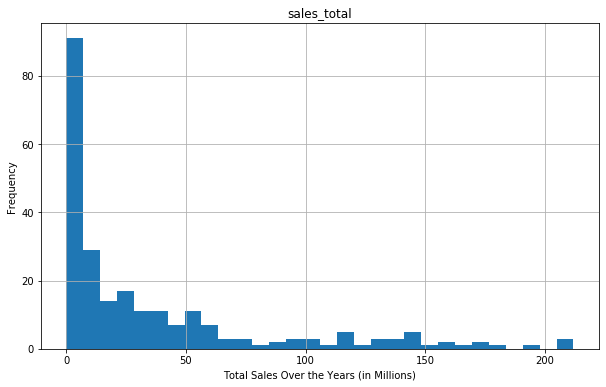

In [34]:
consoles.hist('sales_total', bins=30, figsize=(10, 6))
plt.xlabel('Total Sales Over the Years (in Millions)')
plt.ylabel('Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002917022A508>,
      dtype=object)

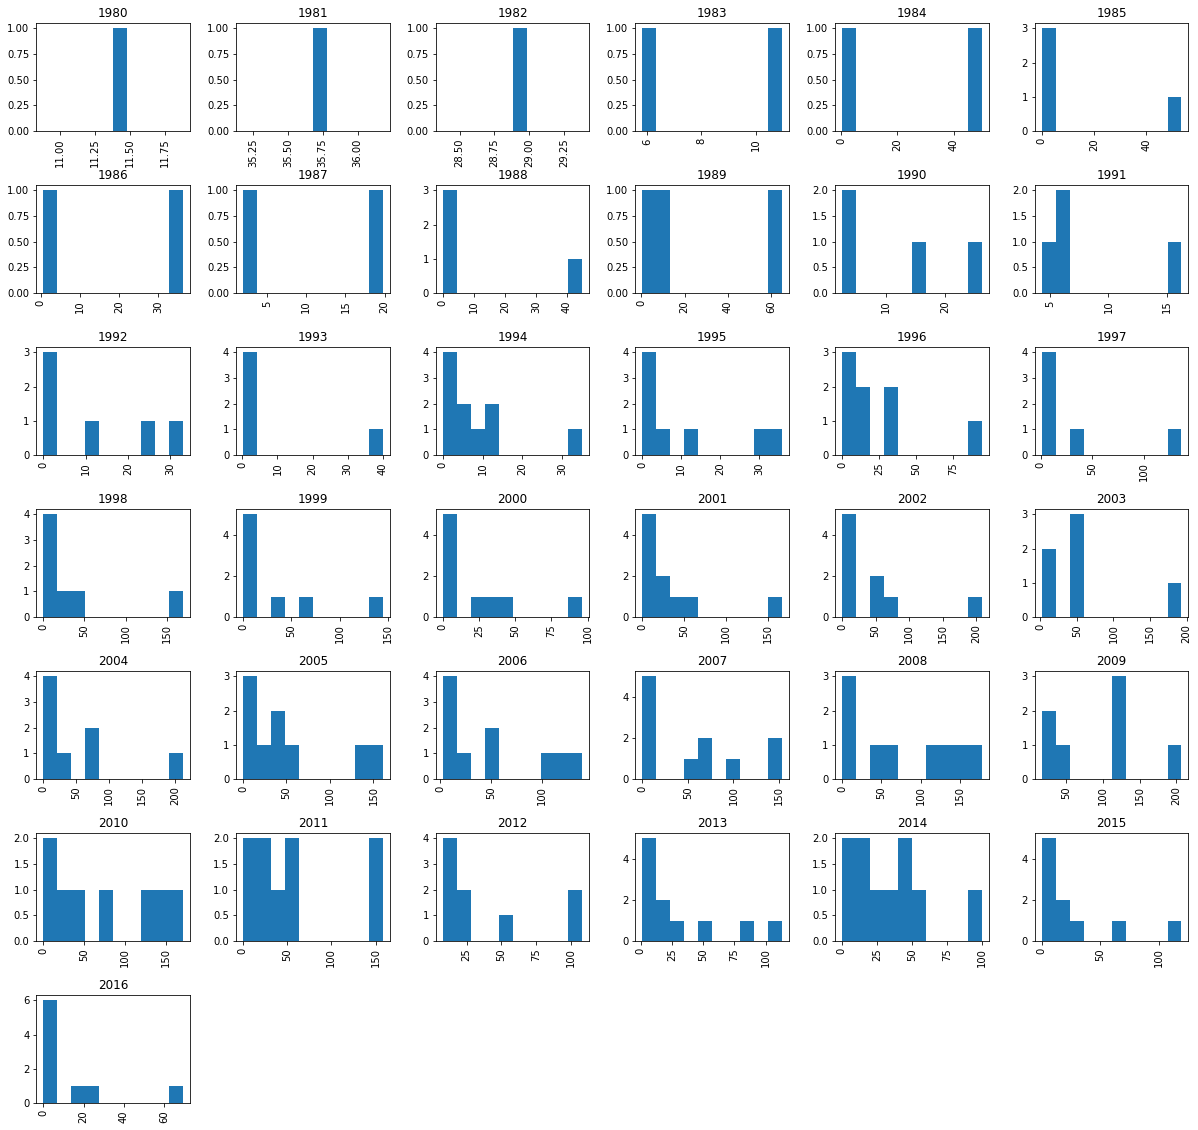

In [35]:
consoles.hist('sales_total', by='year_released', bins=10, figsize=(20,20))

In [36]:
platform = consoles.reset_index()

In [37]:
platform

,platform,year_released,sales_total
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
237,XB,2008,0.18
238,XOne,2013,18.96
239,XOne,2014,54.07
240,XOne,2015,60.14


In [38]:
import seaborn as sns
sns.set()

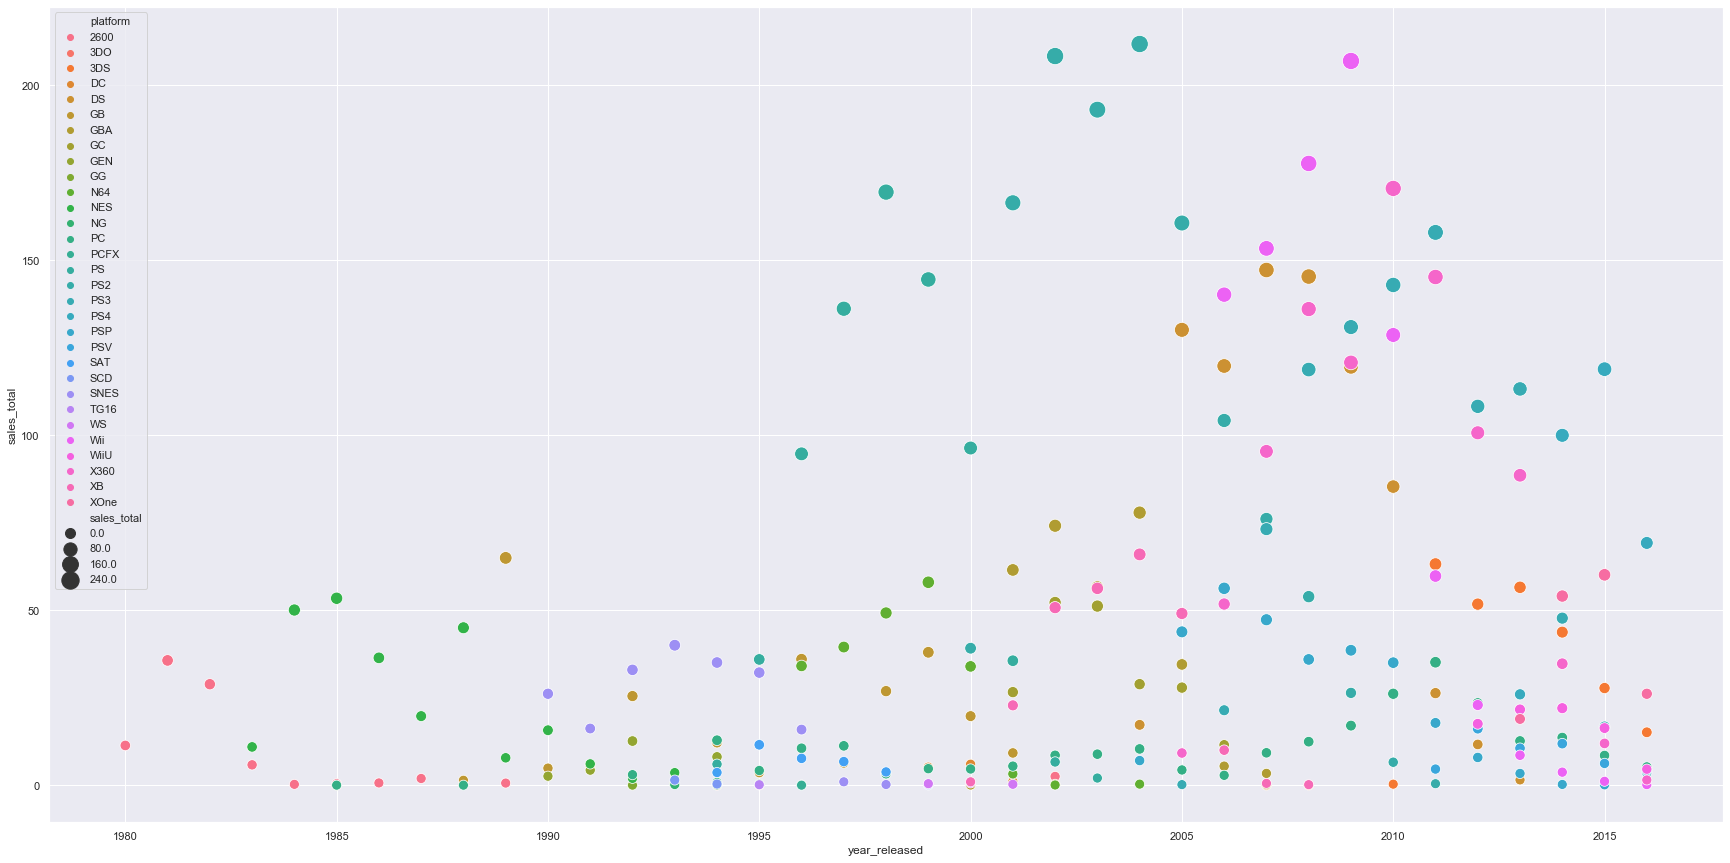

In [39]:
plt.rcParams["figure.figsize"] = (30,15)
sns.scatterplot(x='year_released', y='sales_total', hue='platform', data=platform, size='sales_total', sizes=(100, 300))

Based on these initial observations, in the above chart, I decided to eliminate some of the older platforms that were no longer performing in recent years. We see early on that platforms have limited life-spans, but some more recent consoles, like the PS3, seem to have more sticking power than older systems like the 2600. With that in mind, I am choosing 2005 as the cutoff data. This will allow us to get a closer look at the more relevant platforms. 

In [40]:
new_platform = platform[platform['year_released'] > 2005]

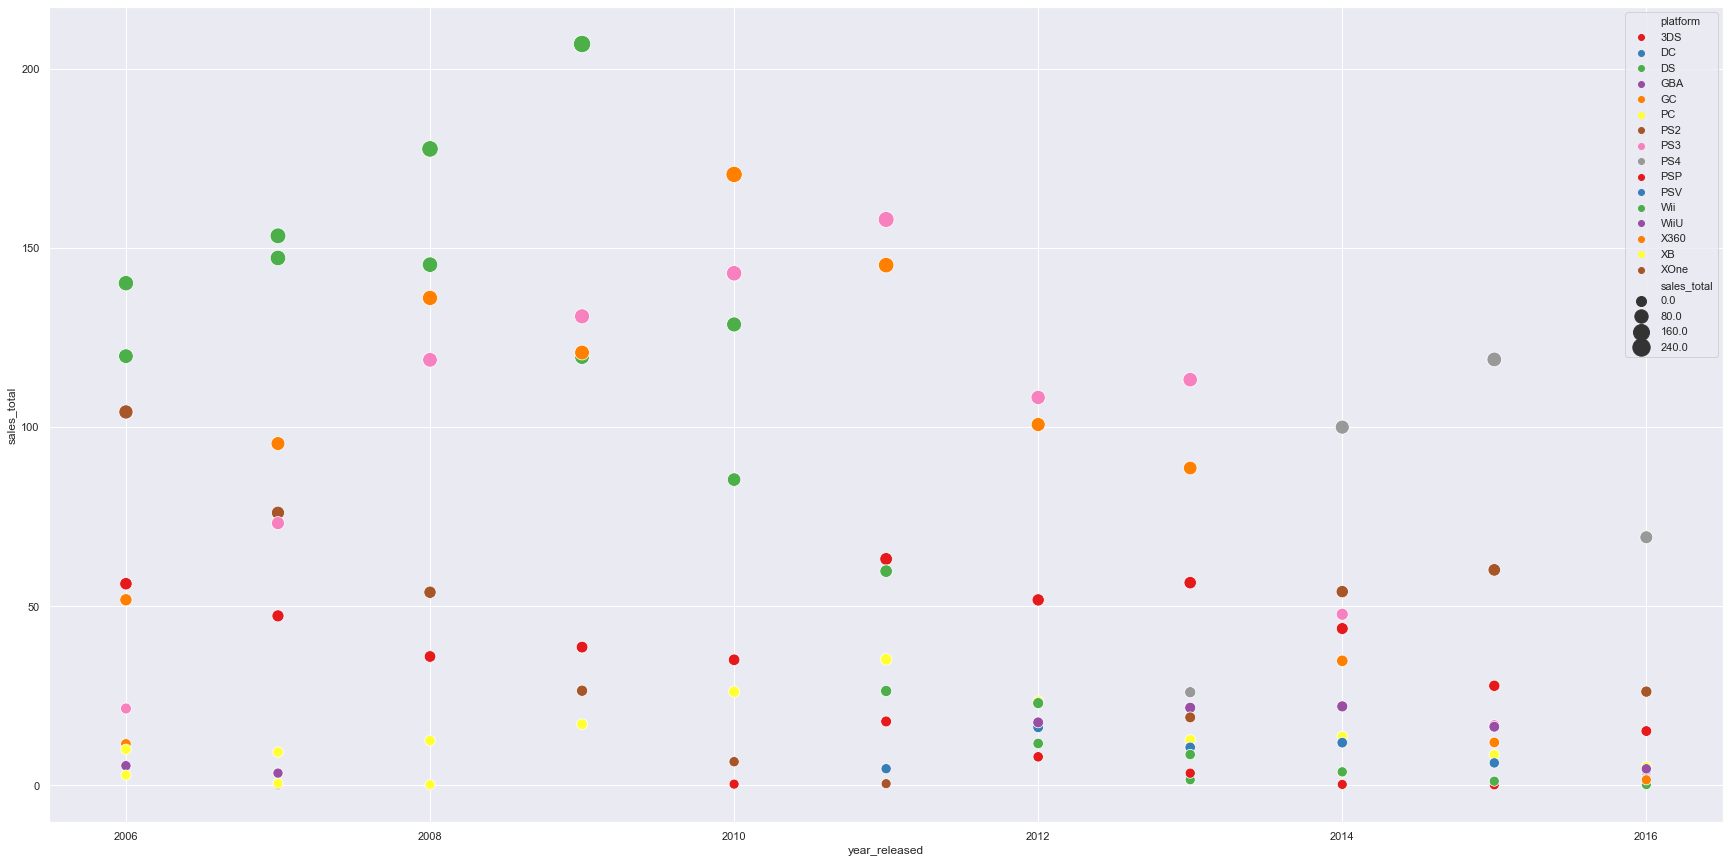

In [41]:
sns.scatterplot(x='year_released', y='sales_total', hue='platform', data=new_platform, size='sales_total', 
                sizes=(100, 300), palette='Set1')

This helps us see more clearly: PS4 and Xbox One are definitely the biggest two sellers. This does not mean we will ignore other categories, but in terms of top performers, these will be our main focus. However, this also makes it clear that we can hone in our focus more -2012 seems like a good starting point for our closer observations. 

In [42]:
plat_2012 = platform[platform['year_released'] > 2011]

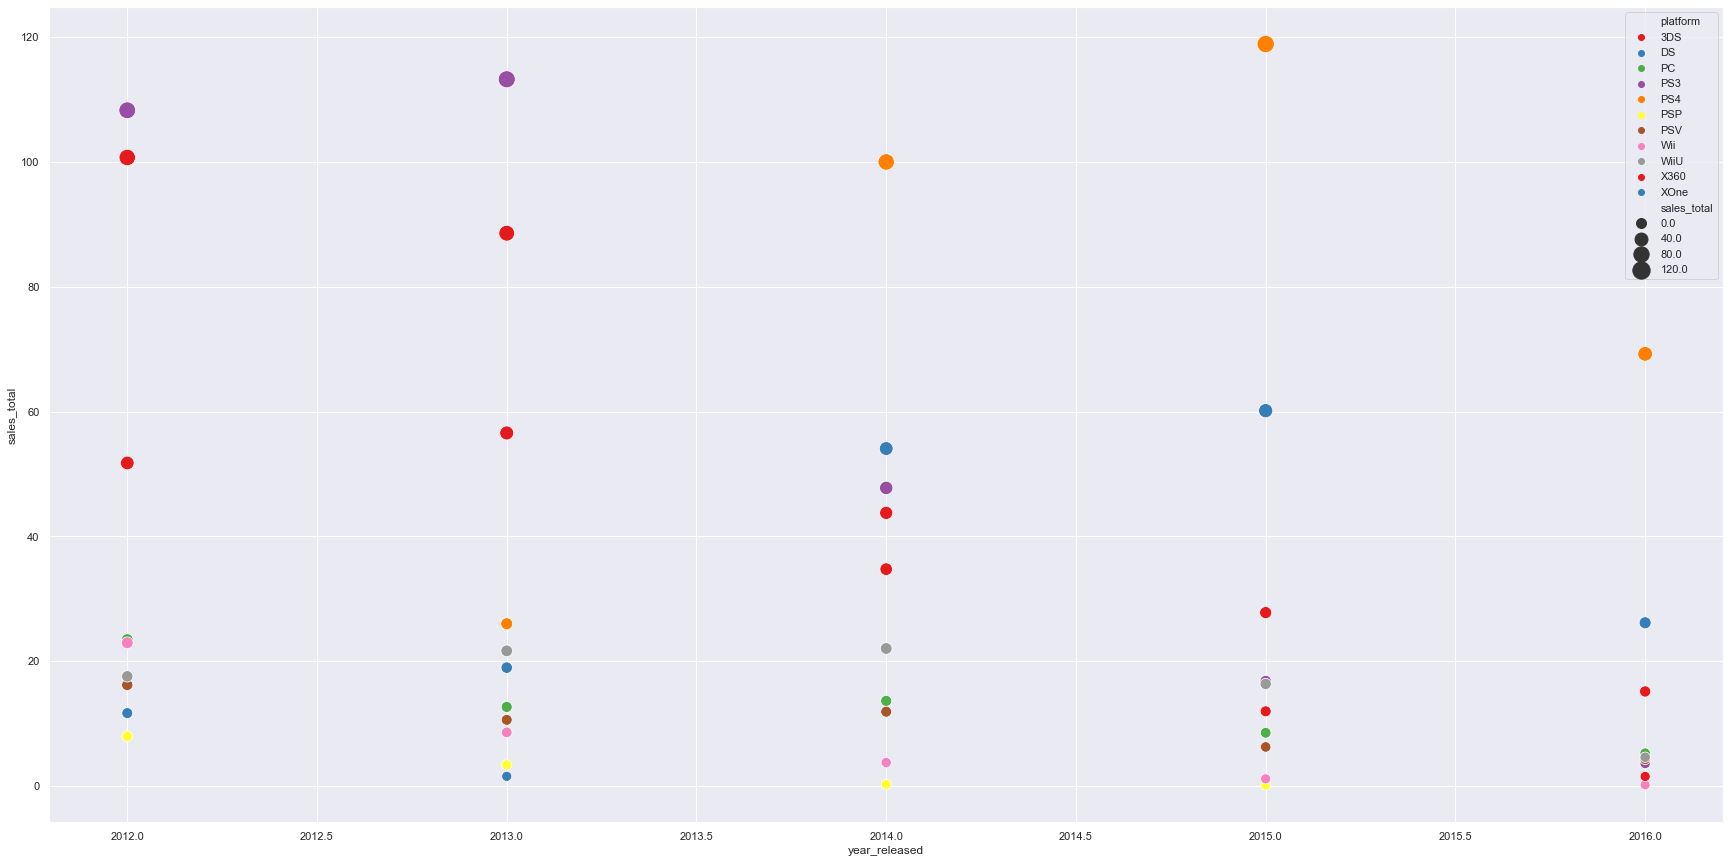

In [43]:
sns.scatterplot(x='year_released', y='sales_total', hue='platform', data=plat_2012, size='sales_total', 
                sizes=(100, 300), palette='Set1')

In [44]:
segment_2012 = df[df['year_released'] > 2011]

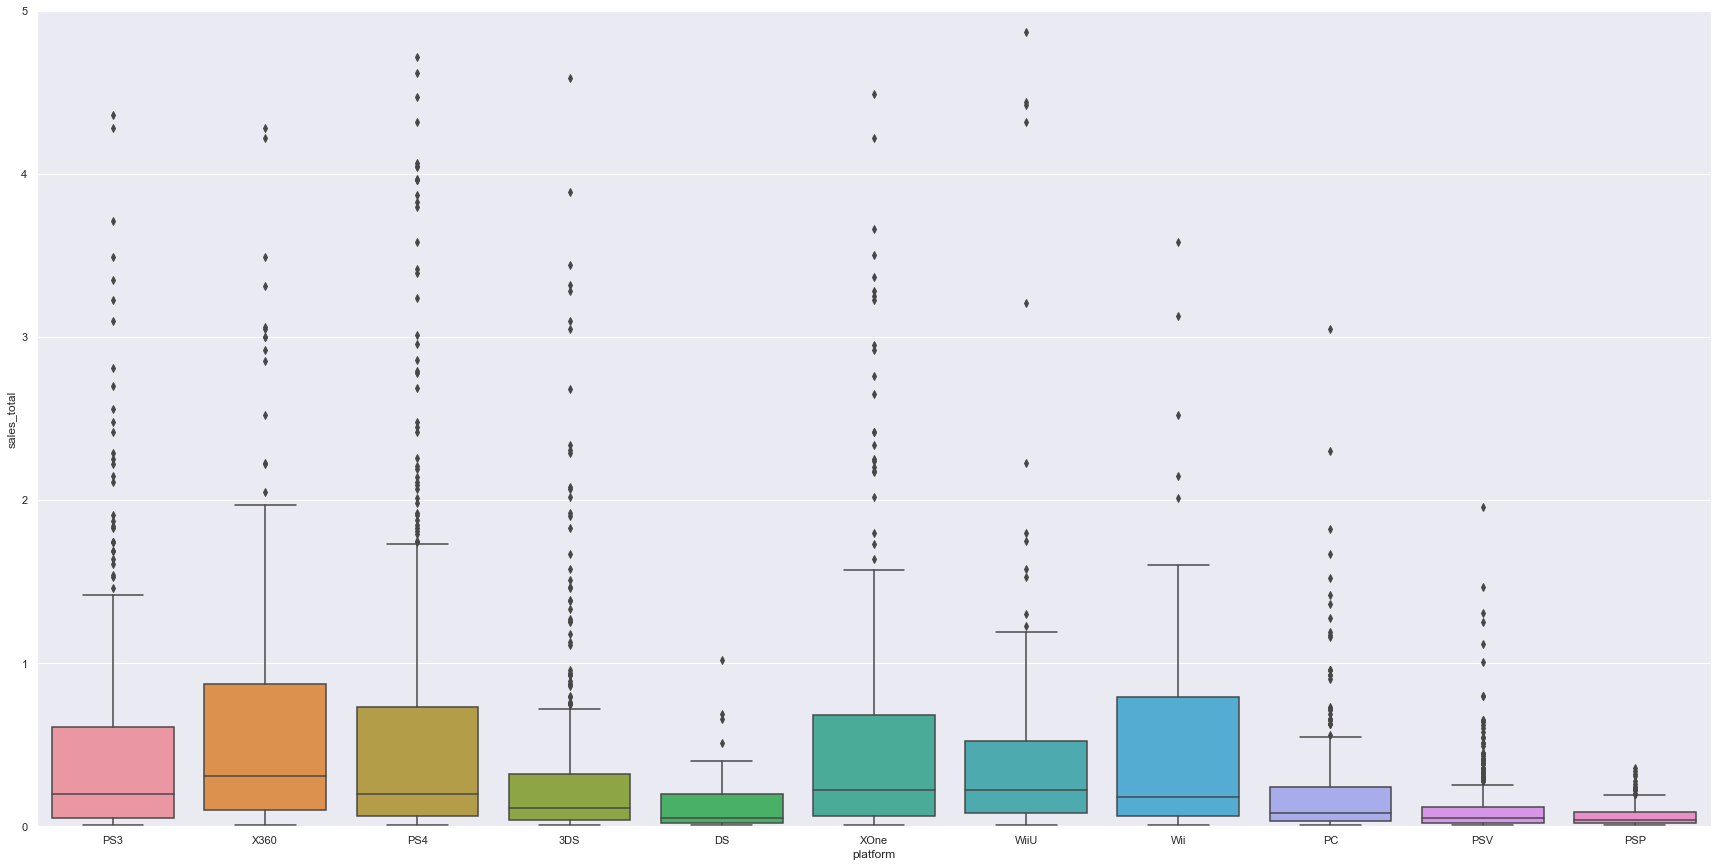

In [45]:
plt.ylim(0, 5)
sns.boxplot(x='platform', y='sales_total', data=segment_2012)

With this broken down further, I decided the boxplot was a better way to visualize the individual distributions of these platforms. In this way, I look more at the complete dataset, seeing individual games from 2012 and beyond. Due to this, I expand my original decision, where I intended to just look at PS4, 3DS, and Xbox One to include some additional platforms for closer observation. 

I limited the size of the graph to ensure I could account for strong outliers, beecause initial observations suggest there are some highly successful games that skew results -even with this limit, we still see a large number of outliers on most platforms. 

Further, I note here that many "older" platforms are still in the runnings at  this point as high performers. But, we know many of these are ceasing new game production. With that in mind, I want to narrow down our search just a bit more.

In [46]:
segment_2014 = df[df['year_released'] >= 2014]

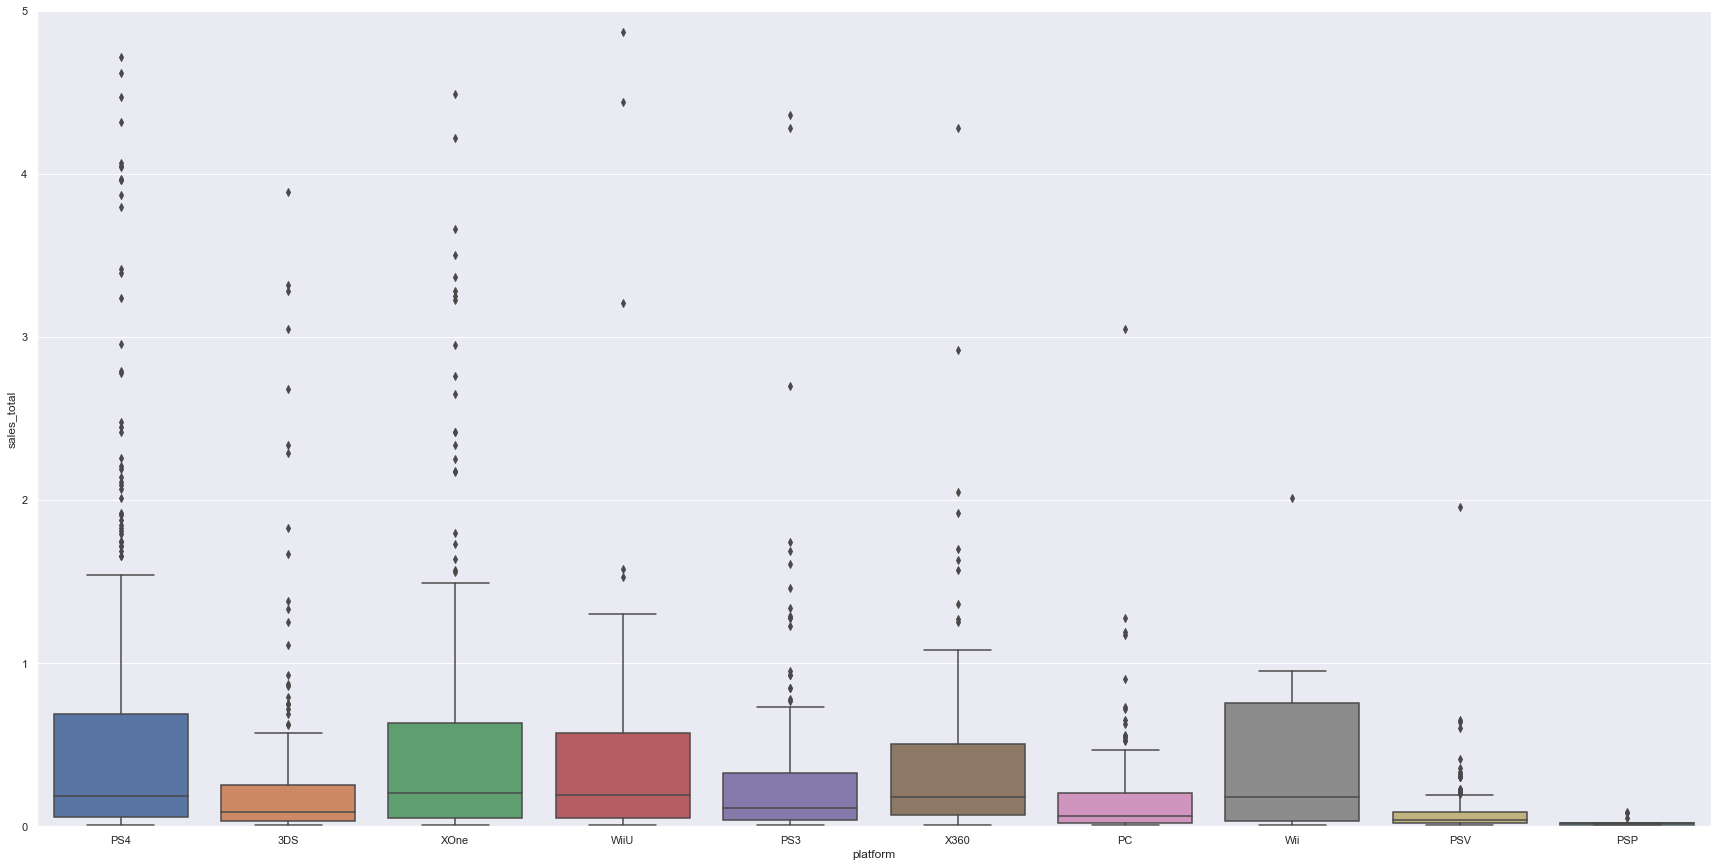

In [47]:
plt.ylim(0, 5)
sns.boxplot(x='platform', y='sales_total', data=segment_2014)

This reveals some important details. But, industry knowledge informs us that in 2015 PS3 stopped releasing new game titles and Xbox 360 ceased in 2016. With that in mind, these platforms will be removed from our calculations by default. PS4 and Xbox One, along with WiiU and the original Nintendo Wii are where we'll focus. After all, the original Wii is still making new games. At this point, I note there are heavy outliers in the 3DS, which may make that console worth exploring as well.

In [48]:
wii = segment_2014[segment_2014['platform'] == 'Wii']

In [49]:
wii_u = segment_2014[segment_2014['platform'] == 'WiiU']

In [50]:
ps = segment_2014[segment_2014['platform'] == 'PS4']

In [51]:
xbox = segment_2014[segment_2014['platform'] == 'XOne']

In [52]:
nds = segment_2014[segment_2014['platform'] == '3DS']

In [53]:
plt.rcParams["figure.figsize"] = (15,6)

Text(0.5, 1.0, 'Wii Sales Distribution Since 2014')

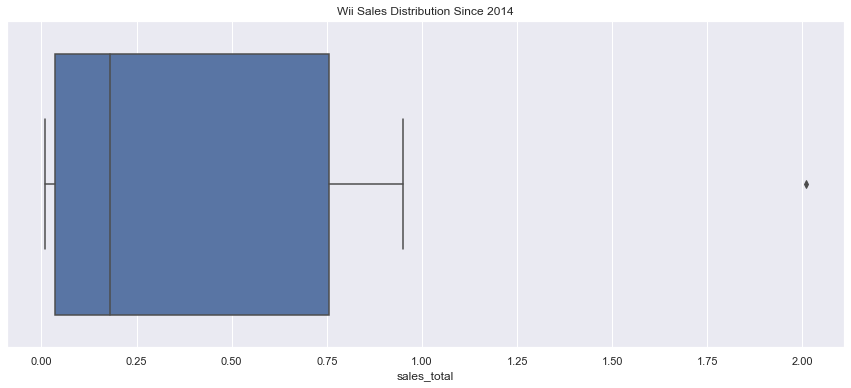

In [54]:
sns.boxplot(x='sales_total', data=wii)
plt.title('Wii Sales Distribution Since 2014')

Text(0.5, 1.0, 'WiiU Sales Distribution Since 2014')

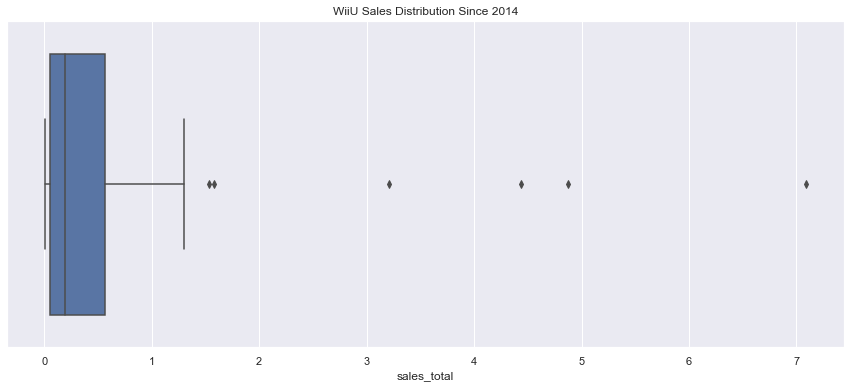

In [55]:
sns.boxplot(x='sales_total', data=wii_u)
plt.title('WiiU Sales Distribution Since 2014')

Text(0.5, 1.0, 'PS4 Sales Distribution Since 2014')

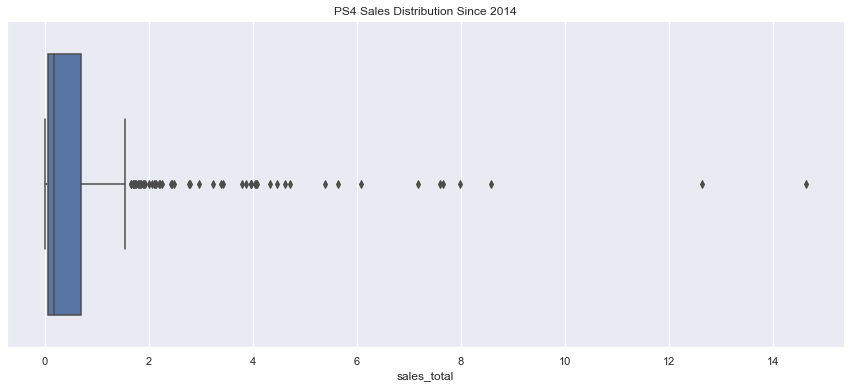

In [56]:
sns.boxplot(x='sales_total', data=ps)
plt.title('PS4 Sales Distribution Since 2014')

Text(0.5, 1.0, 'Xbox One Sales Distribution Since 2014')

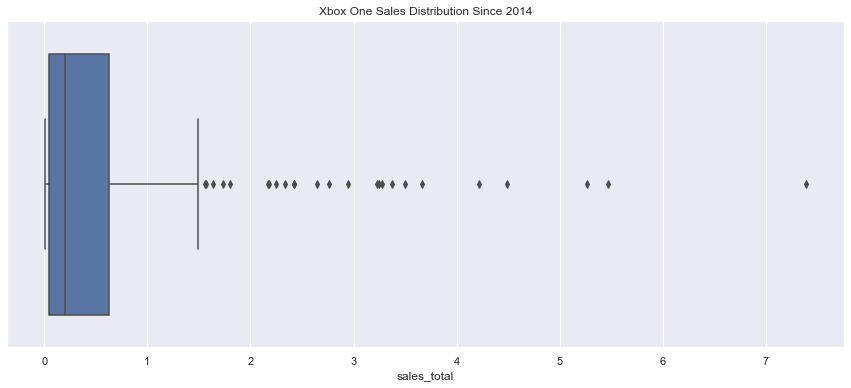

In [57]:
sns.boxplot(x='sales_total', data=xbox)
plt.title('Xbox One Sales Distribution Since 2014')

Text(0.5, 1.0, '3DS Sales Distribution Since 2014')

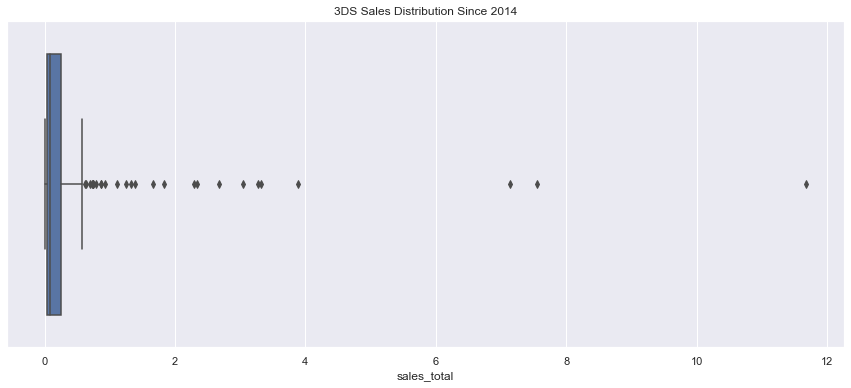

In [58]:
sns.boxplot(x='sales_total', data=nds)
plt.title('3DS Sales Distribution Since 2014')

The first thing I did here was take a general look at how many games were released in any given year. We see from about 2005-2011 there was the largest volume of released. After that, things slowed down to more 90's/early 2000 numbers. This is likely due to more advanced gaming systems requiring longer development times. It could also be due to overall fewer systems being utilized. With that in mind, the next thing I did was create a pivot table to organize the data based on platform and on release year. Looking at the overall distribution didn't provide much insight beyond seeing that most years tended to have lower than $50 million in game sales. 

From there, I looked at each year individually to get a better idea of what they look like. While this provides some further insight on performance year-to-year, the next step was to break down the sales by platform and year. I made some notes along the way for this proces, until I broke everything down into four main platforms of interest: DS, PC, PS, and Xbox (the latest generation of consoles). 

After this, I created a boxplot of each of these platforms to get a better idea of the distribution for individual games on them. Here we get a clear picture that while there is less consistency on platforms like Xbox One and Playstation 4, those two clearly outperform other systems. Alternatively, the Wii is more consistently selling games across the board, but lacks titles that compete with these two larger platforms. WiiU also tends to follow Xbox and Playstation, but its smaller amount of high-selling games leaves it behind. Said differently the latest generation of consoles seem to succeed best with those unusual games -the outliers that sell well beyond the average. 

In [59]:
wii.describe()

,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,year_released,sales_total
count,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000,11.000000
mean,0.189091,0.235455,0.0,0.036364,-1.0,-0.363636,2014.545455,0.460909
std,0.308398,0.268118,0.0,0.053902,0.0,3.294624,0.687552,0.625451
min,0.000000,0.010000,0.0,0.000000,-1.0,-2.000000,2014.000000,0.010000
25%,0.000000,0.035000,0.0,0.000000,-1.0,-2.000000,2014.000000,0.035000
50%,0.040000,0.120000,0.0,0.010000,-1.0,-2.000000,2014.000000,0.180000
75%,0.280000,0.415000,0.0,0.060000,-1.0,-1.000000,2015.000000,0.755000
max,0.990000,0.850000,0.0,0.170000,-1.0,8.000000,2016.000000,2.010000


In [60]:
wii_u.describe()

,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,year_released,sales_total
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.265205,0.180137,0.100137,0.043288,41.520548,3.958904,2014.767123,0.588767
std,0.519632,0.328407,0.261712,0.082547,37.319979,3.945597,0.754994,1.161467
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,2014.000000,0.010000
25%,0.010000,0.010000,0.000000,0.000000,-1.000000,-1.000000,2014.000000,0.050000
50%,0.090000,0.060000,0.010000,0.020000,58.000000,6.000000,2015.000000,0.190000
75%,0.280000,0.210000,0.090000,0.050000,75.000000,7.000000,2015.000000,0.570000
max,3.150000,2.150000,1.460000,0.510000,91.000000,9.000000,2016.000000,7.090000


In [61]:
xbox.describe()

,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,year_released,sales_total
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.356447,0.202851,0.001404,0.054912,49.846491,4.157895,2015.114035,0.615614
std,0.634756,0.371972,0.005289,0.095065,36.398288,3.504758,0.799325,1.046513
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,2014.000000,0.010000
25%,0.030000,0.020000,0.000000,0.000000,-1.000000,-1.000000,2014.000000,0.050000
50%,0.100000,0.070000,0.000000,0.020000,67.000000,6.000000,2015.000000,0.205000
75%,0.352500,0.210000,0.000000,0.052500,80.000000,7.000000,2016.000000,0.632500
max,4.590000,2.190000,0.040000,0.680000,97.000000,9.000000,2016.000000,7.390000


In [62]:
ps.describe()

,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,year_released,sales_total
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,0.262261,0.345851,0.039947,0.118298,45.117021,3.736702,2015.236702,0.766356
std,0.583439,0.815480,0.067048,0.256506,36.668492,3.743415,0.762336,1.614969
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,2014.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,2015.000000,0.057500
50%,0.050000,0.070000,0.015000,0.020000,64.000000,6.000000,2015.000000,0.185000
75%,0.240000,0.280000,0.050000,0.102500,76.250000,7.000000,2016.000000,0.690000
max,6.030000,6.310000,0.490000,2.380000,97.000000,9.000000,2016.000000,14.630000


In [63]:
nds.describe()

,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,year_released,sales_total
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.106792,0.076038,0.208679,0.017358,15.834906,0.891509,2014.839623,0.408868
std,0.440719,0.295478,0.529456,0.070365,30.628737,3.526813,0.755853,1.188368
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,2014.000000,0.010000
25%,0.000000,0.000000,0.010000,0.000000,-1.000000,-1.000000,2014.000000,0.030000
50%,0.000000,0.000000,0.055000,0.000000,-1.000000,-1.000000,2015.000000,0.090000
75%,0.050000,0.040000,0.132500,0.010000,-1.000000,2.250000,2015.000000,0.250000
max,4.350000,3.490000,3.180000,0.740000,90.000000,9.000000,2016.000000,11.680000


Looking more closely, I note that part of the reason Wii was staying so solid is that it has a very small number of games that are consistently selling. This suggests that we might want to look more at the latest generation of gaming systems and not at any older ones, such as the original Wii. 

Text(0.5, 0, 'Critic Score')

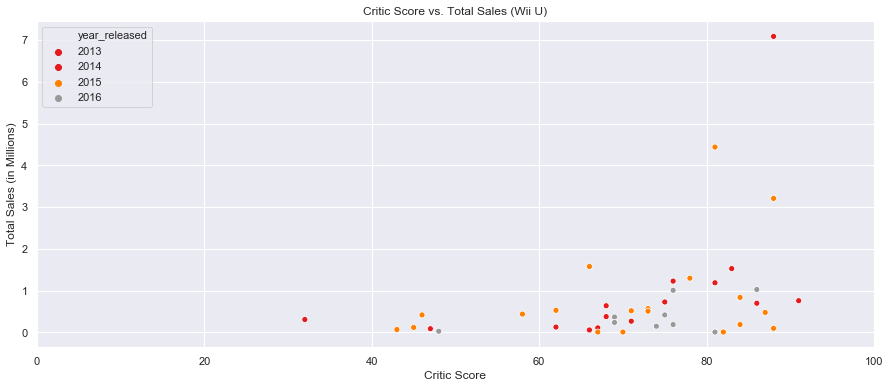

In [64]:
plt.xlim(0, 100)
sns.scatterplot(x='crit_score', y='sales_total', hue='year_released', data=wii_u, palette='Set1')
plt.title('Critic Score vs. Total Sales (Wii U)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('Critic Score')

In [65]:
st.pearsonr(wii_u['crit_score'], wii_u['sales_total'])

(0.29129578447715654, 0.012406870894950475)

Text(0.5, 0, 'User Score')

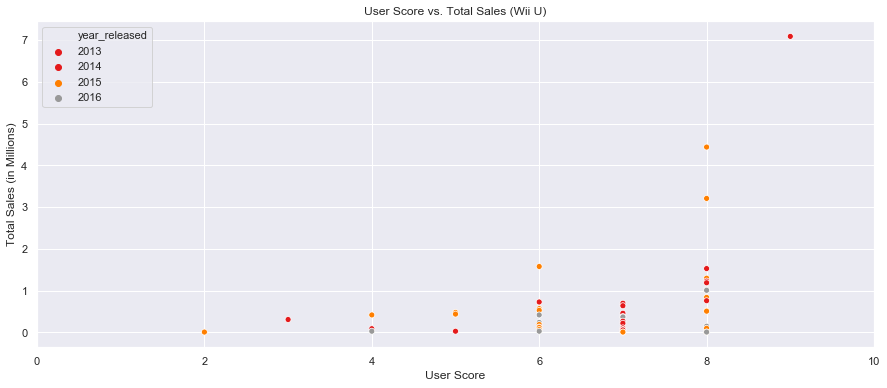

In [66]:
plt.xlim(0, 10)
sns.scatterplot(x='user_score', y='sales_total', hue='year_released', data=wii_u, palette='Set1')
plt.title('User Score vs. Total Sales (Wii U)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('User Score')

In [67]:
st.pearsonr(wii_u['user_score'], wii_u['sales_total'])

(0.26145031072798747, 0.025463693514421553)

Text(0.5, 0, 'Critic Score')

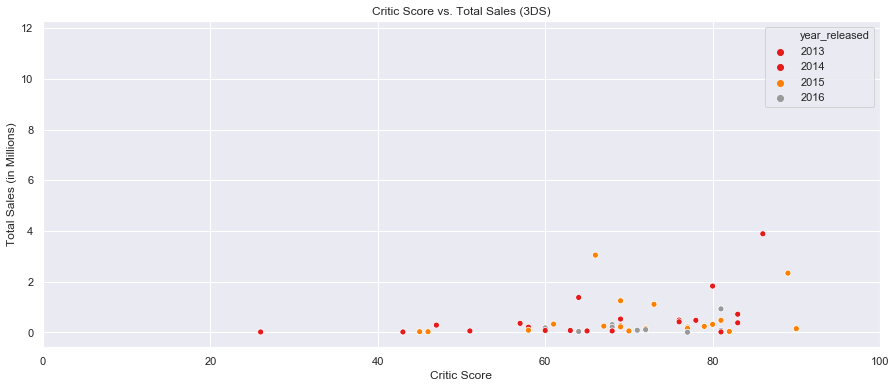

In [68]:
plt.xlim(0, 100)
sns.scatterplot(x='crit_score', y='sales_total', hue='year_released', data=nds, palette='Set1')
plt.title('Critic Score vs. Total Sales (3DS)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('Critic Score')

In [69]:
st.pearsonr(nds['crit_score'], nds['sales_total'])

(0.05299207908897053, 0.44275217619987367)

Text(0.5, 0, 'User Score')

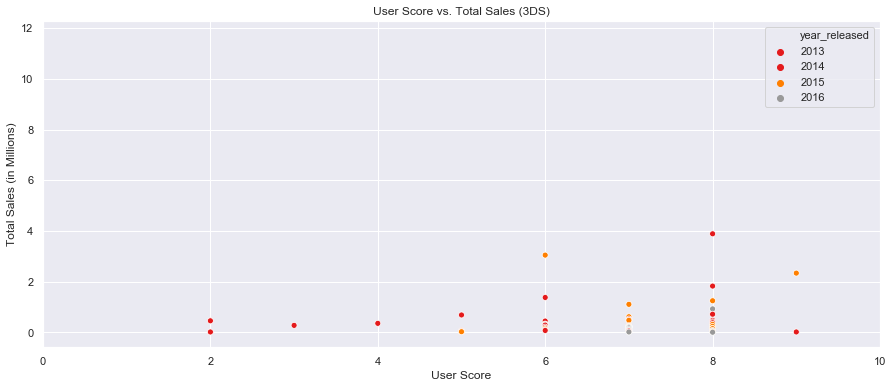

In [70]:
plt.xlim(0, 10)
sns.scatterplot(x='user_score', y='sales_total', hue='year_released', data=nds, palette='Set1')
plt.title('User Score vs. Total Sales (3DS)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('User Score')

In [71]:
st.pearsonr(nds['user_score'], nds['sales_total'])

(0.05963133487147827, 0.38765321646729933)

Text(0.5, 0, 'Critic Score')

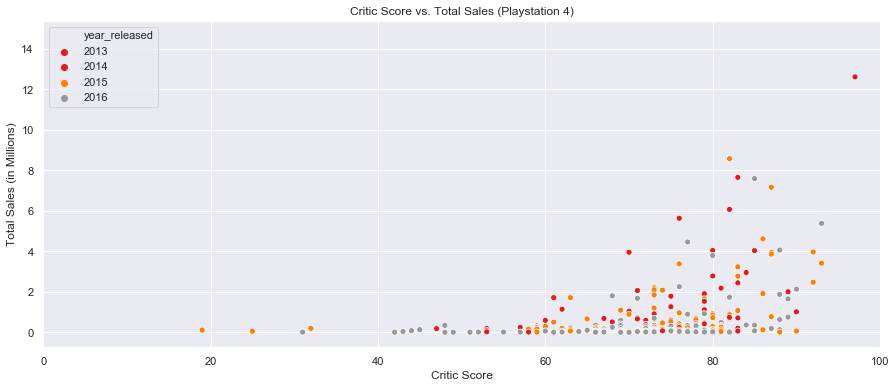

In [72]:
plt.xlim(0, 100)
sns.scatterplot(x='crit_score', y='sales_total', hue='year_released', data=ps, palette='Set1')
plt.title('Critic Score vs. Total Sales (Playstation 4)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('Critic Score')

In [73]:
st.pearsonr(ps['crit_score'], ps['sales_total'])

(0.21084685336721343, 3.767690649651004e-05)

Text(0.5, 0, 'User Score')

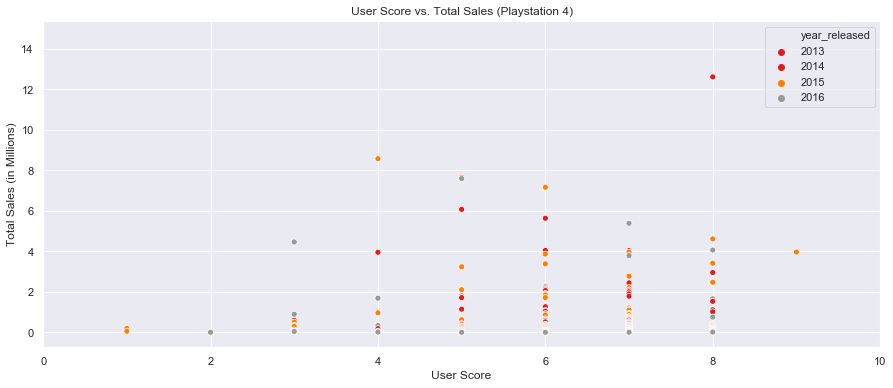

In [74]:
plt.xlim(0, 10)
sns.scatterplot(x='user_score', y='sales_total', hue='year_released', data=ps, palette='Set1')
plt.title('User Score vs. Total Sales (Playstation 4)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('User Score')

In [75]:
st.pearsonr(ps['user_score'], ps['sales_total'])

(0.1066531481441747, 0.03872523693228383)

Text(0.5, 0, 'Critic Score')

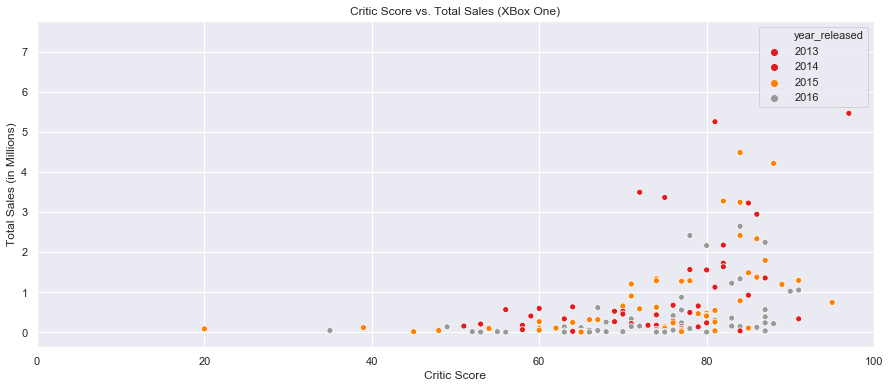

In [76]:
plt.xlim(0, 100)
sns.scatterplot(x='crit_score', y='sales_total', hue='year_released', data=xbox, palette='Set1')
plt.title('Critic Score vs. Total Sales (XBox One)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('Critic Score')

In [77]:
st.pearsonr(xbox['crit_score'], xbox['sales_total'])

(0.2714759141924189, 3.253404095637677e-05)

Text(0.5, 0, 'User Score')

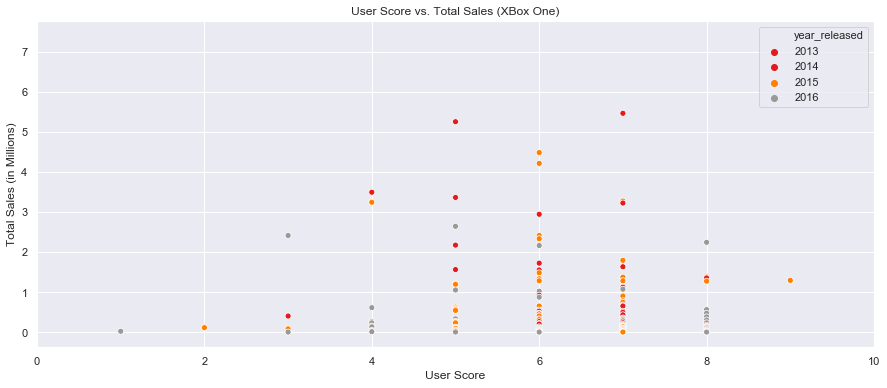

In [78]:
plt.xlim(0, 10)
sns.scatterplot(x='user_score', y='sales_total', hue='year_released', data=xbox, palette='Set1')
plt.title('User Score vs. Total Sales (XBox One)')
plt.ylabel('Total Sales (in Millions)')
plt.xlabel('User Score')

In [79]:
st.pearsonr(xbox['user_score'], xbox['sales_total'])

(0.10819063911533879, 0.10321775433713708)

Text(0.5, 0, 'Release Year')

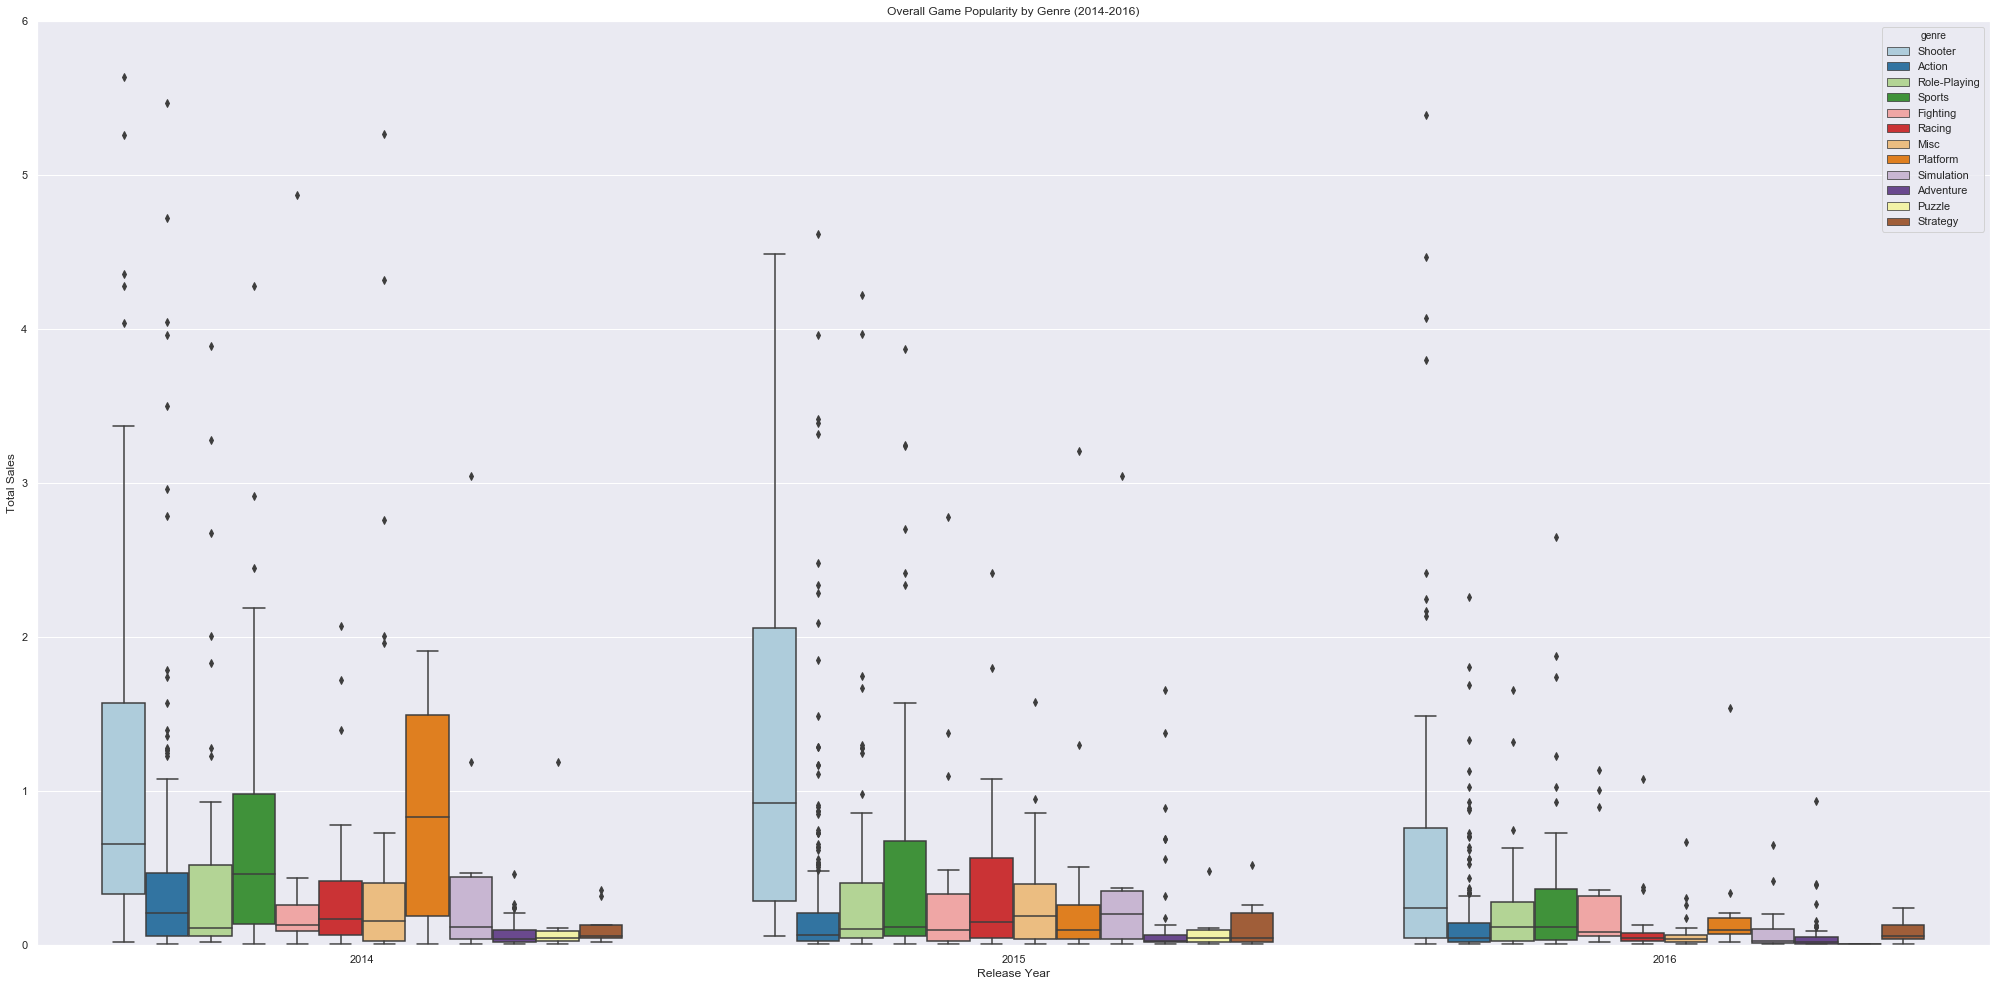

In [80]:
plt.rcParams["figure.figsize"] = (35,17)
plt.ylim(0, 6)
sns.boxplot(x='year_released', y='sales_total', hue='genre', data=segment_2014, palette='Paired')
plt.title('Overall Game Popularity by Genre (2014-2016)')
plt.ylabel('Total Sales')
plt.xlabel('Release Year')

After looking at this information, we can see "shooters" are the most popular type of games for the past few years. However, other games seem to fluctuate in popularity. Sports games are consistently strong as well and role-playing tends to stay near the top in popularity. We also see in 2014 that "platformers" were extremely popular. With this all in mind, I want to extend our look back a bit to see genres from other recent years. 

Text(0.5, 0, 'Release Year')

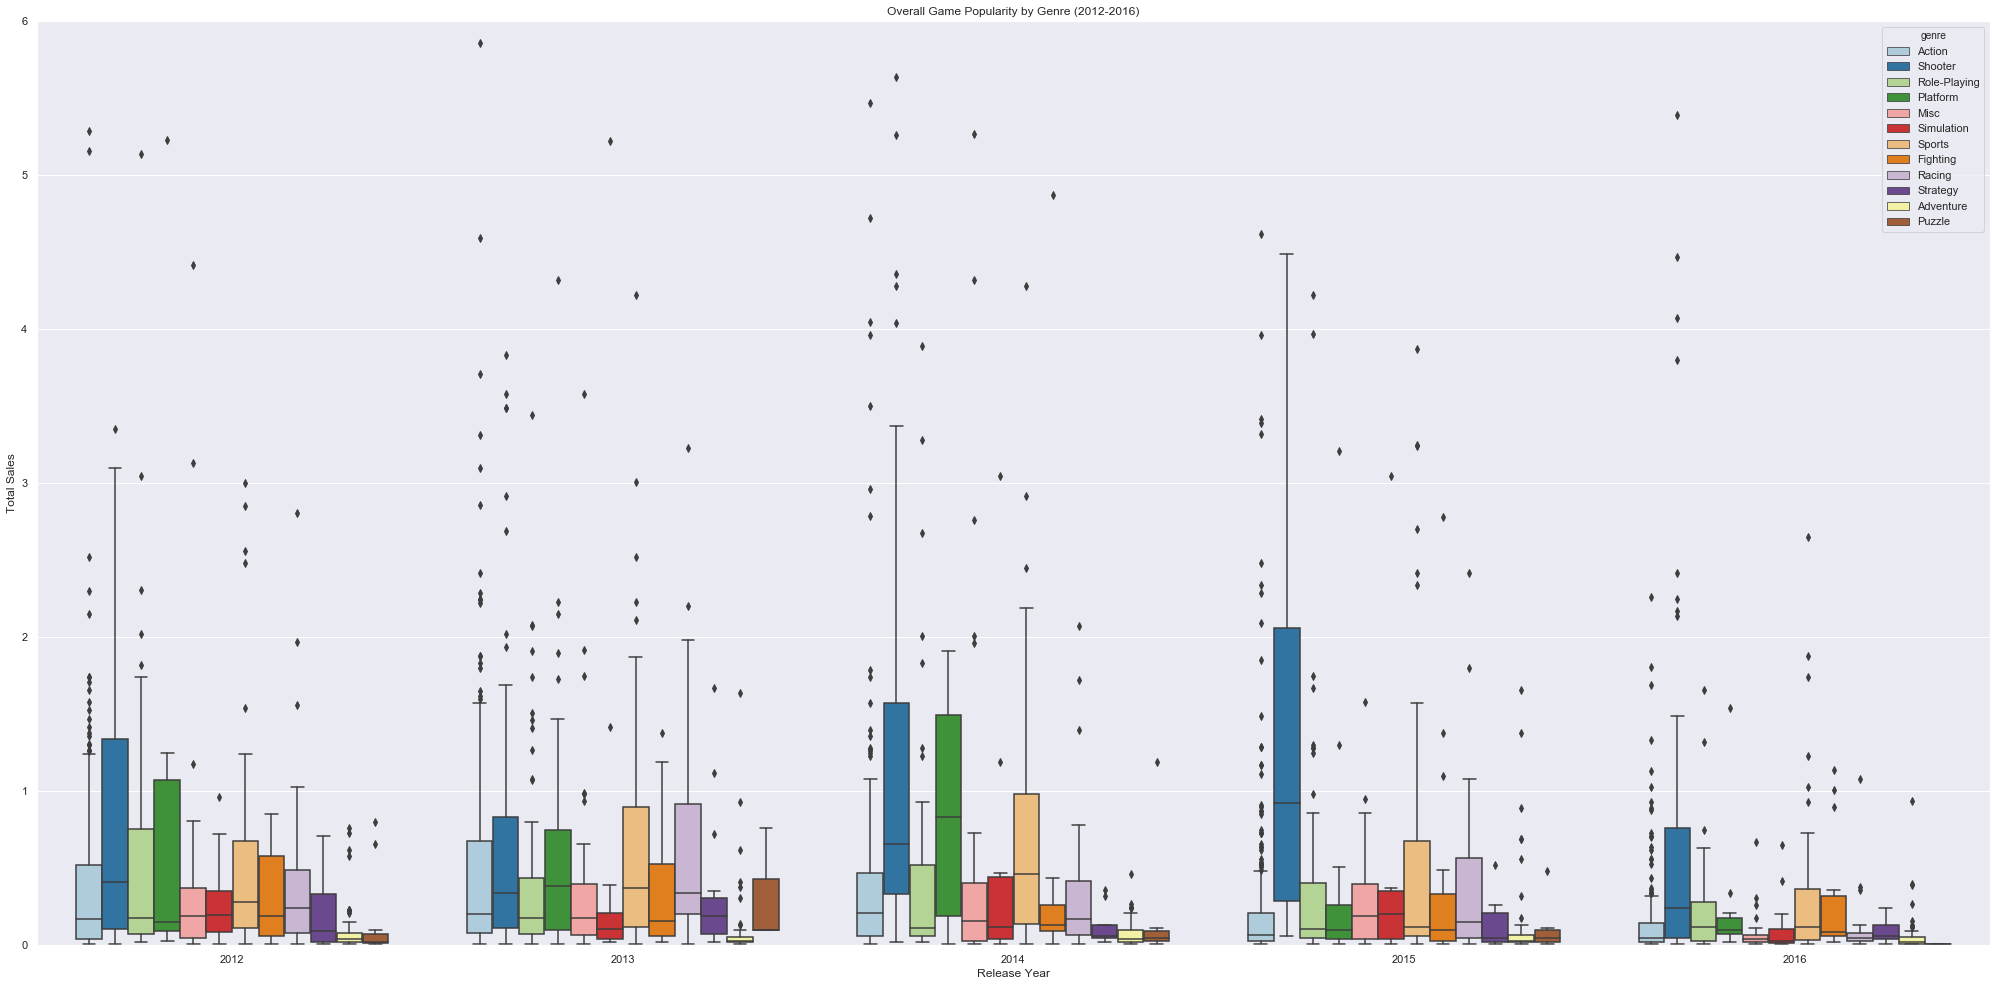

In [81]:
plt.ylim(0, 6)
sns.boxplot(x='year_released', y='sales_total', hue='genre', data=segment_2012, palette='Paired')
plt.title('Overall Game Popularity by Genre (2012-2016)')
plt.ylabel('Total Sales')
plt.xlabel('Release Year')

Including both 2012 and 2013 gives an interesting view on how things have changed -prior to 2014, it definitely looks like we have a more balanced average distribution. Yes, certain categories still have strong outliers, but overall the average distribution among genre, across these different platforms, was definitely more balanced. 

This helps confirm that the preior 3 years (2014-2016) are where we get the best data for forecasting 2017. 

Text(0.5, 0, 'Release Year')

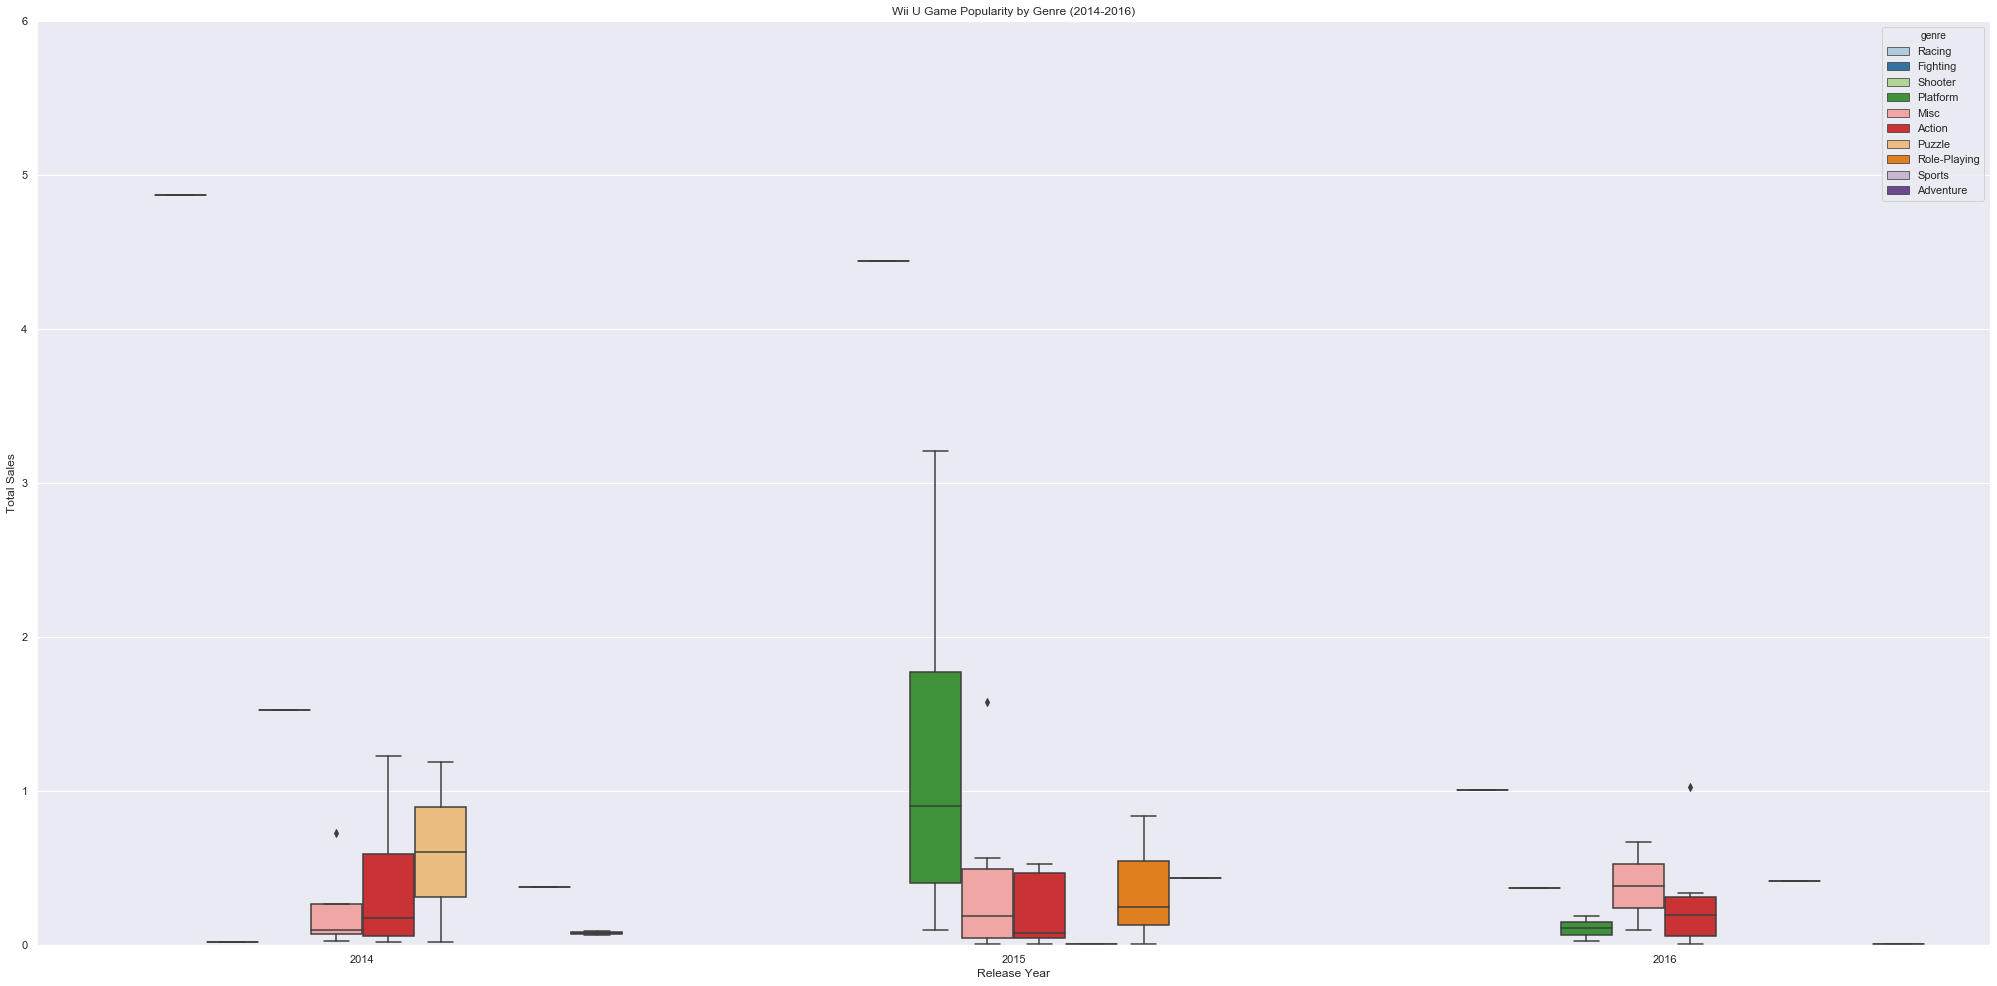

In [82]:
plt.ylim(0, 6)
sns.boxplot(x='year_released', y='sales_total', hue='genre', data=wii_u, palette='Paired')
plt.title('Wii U Game Popularity by Genre (2014-2016)')
plt.ylabel('Total Sales')
plt.xlabel('Release Year')

Text(0.5, 0, 'Release Year')

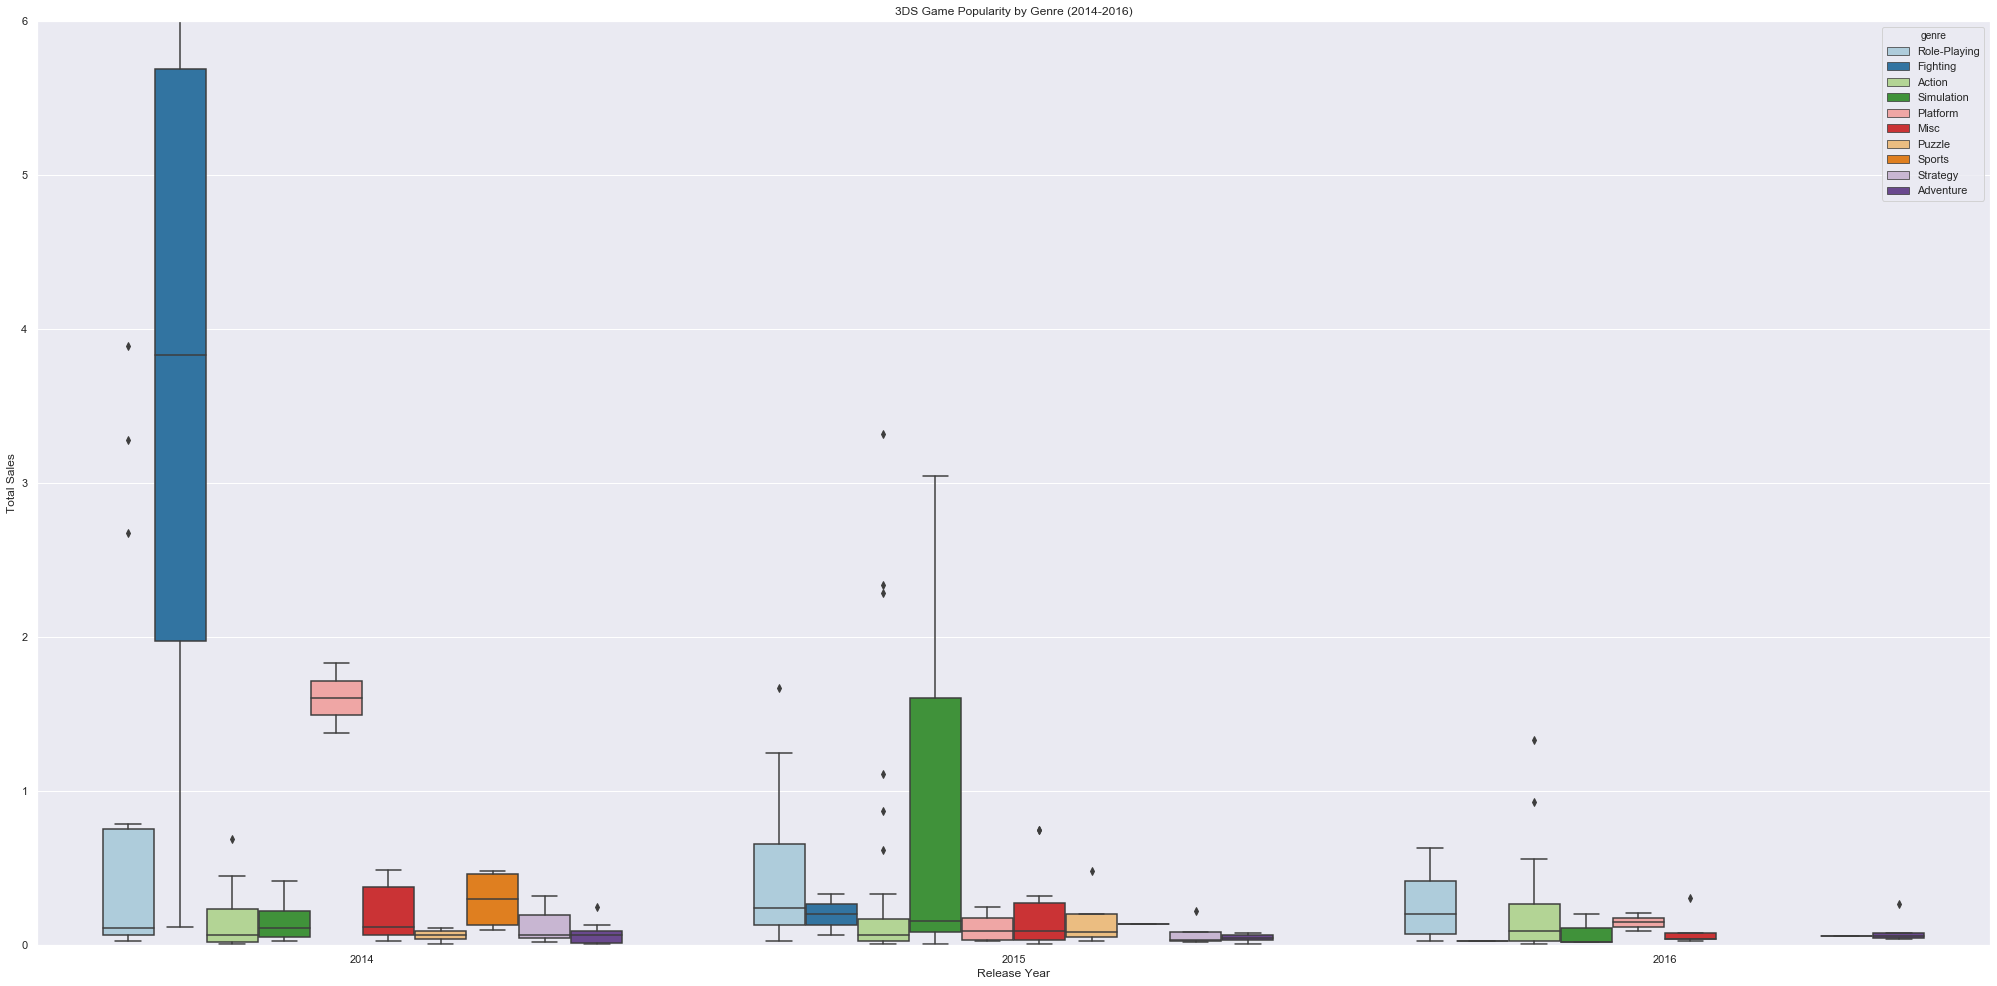

In [83]:
plt.ylim(0, 6)
sns.boxplot(x='year_released', y='sales_total', hue='genre', data=nds, palette='Paired')
plt.title('3DS Game Popularity by Genre (2014-2016)')
plt.ylabel('Total Sales')
plt.xlabel('Release Year')

Text(0.5, 0, 'Release Year')

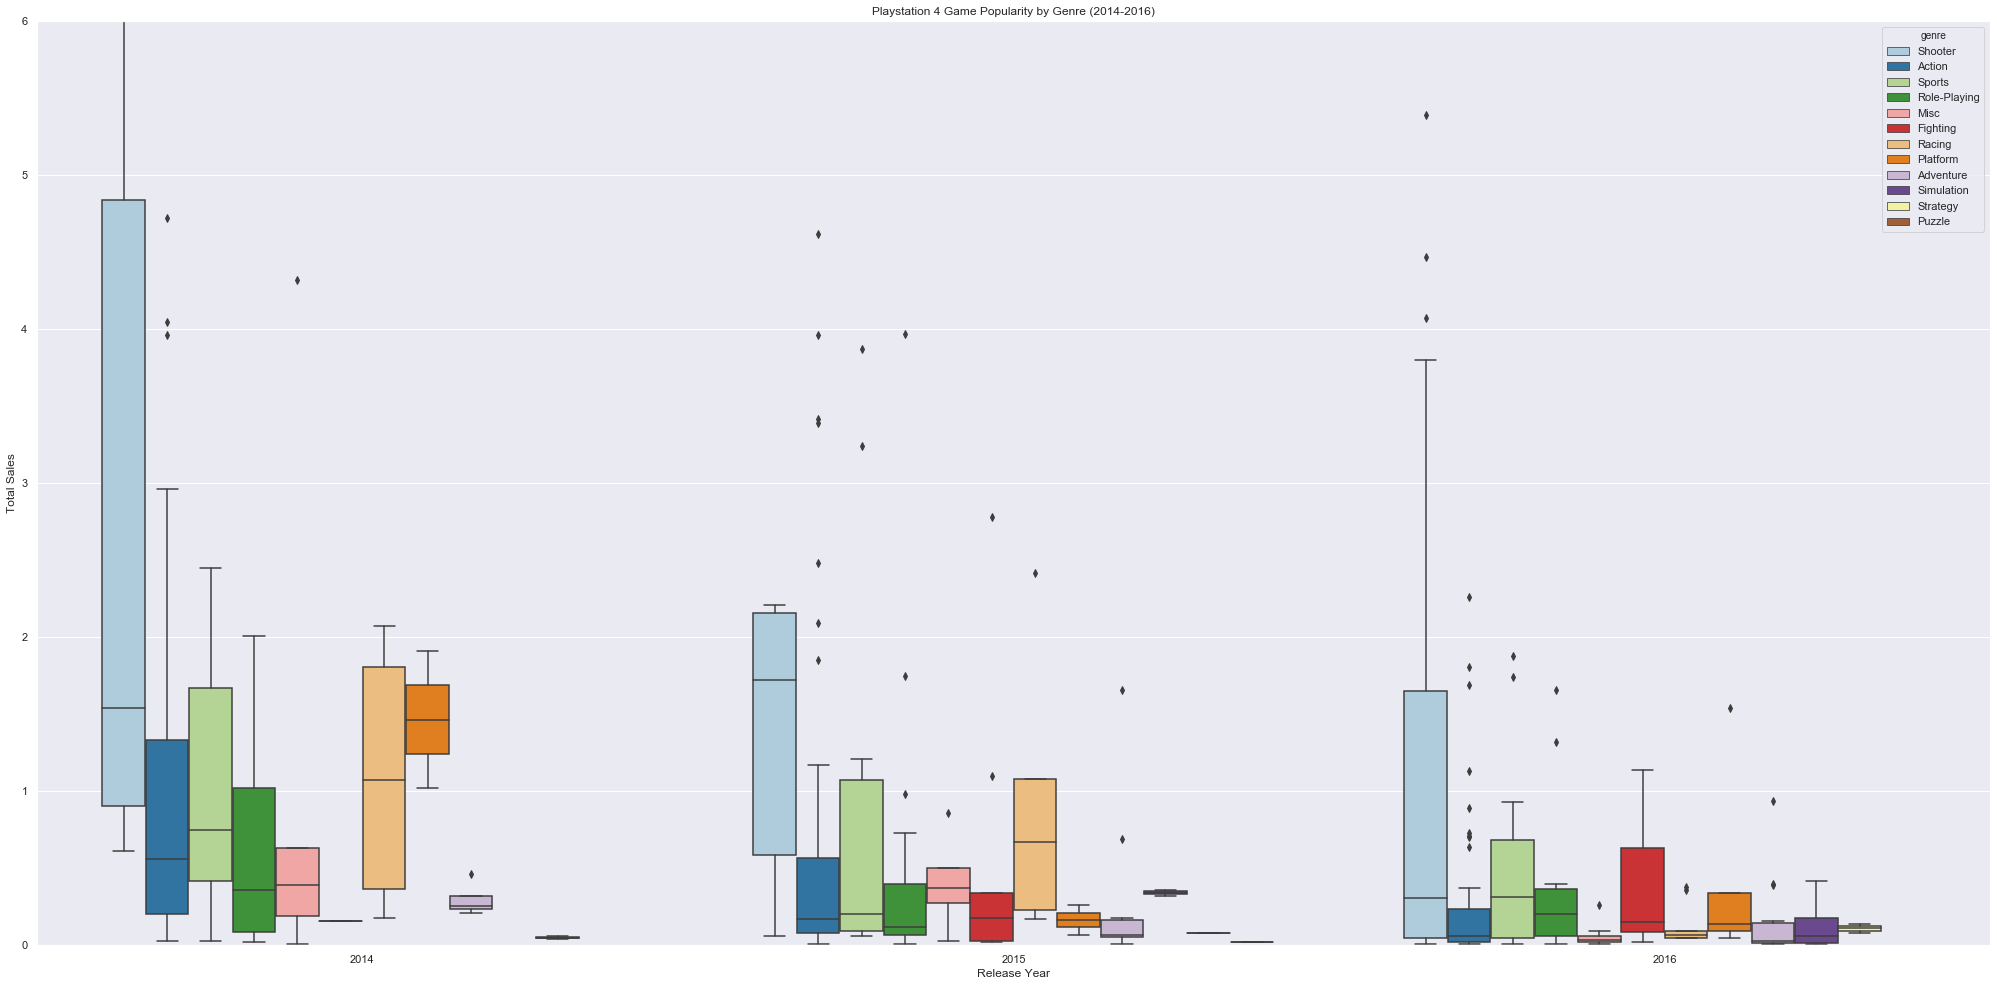

In [84]:
plt.ylim(0, 6)
sns.boxplot(x='year_released', y='sales_total', hue='genre', data=ps, palette='Paired')
plt.title('Playstation 4 Game Popularity by Genre (2014-2016)')
plt.ylabel('Total Sales')
plt.xlabel('Release Year')

Text(0.5, 0, 'Release Year')

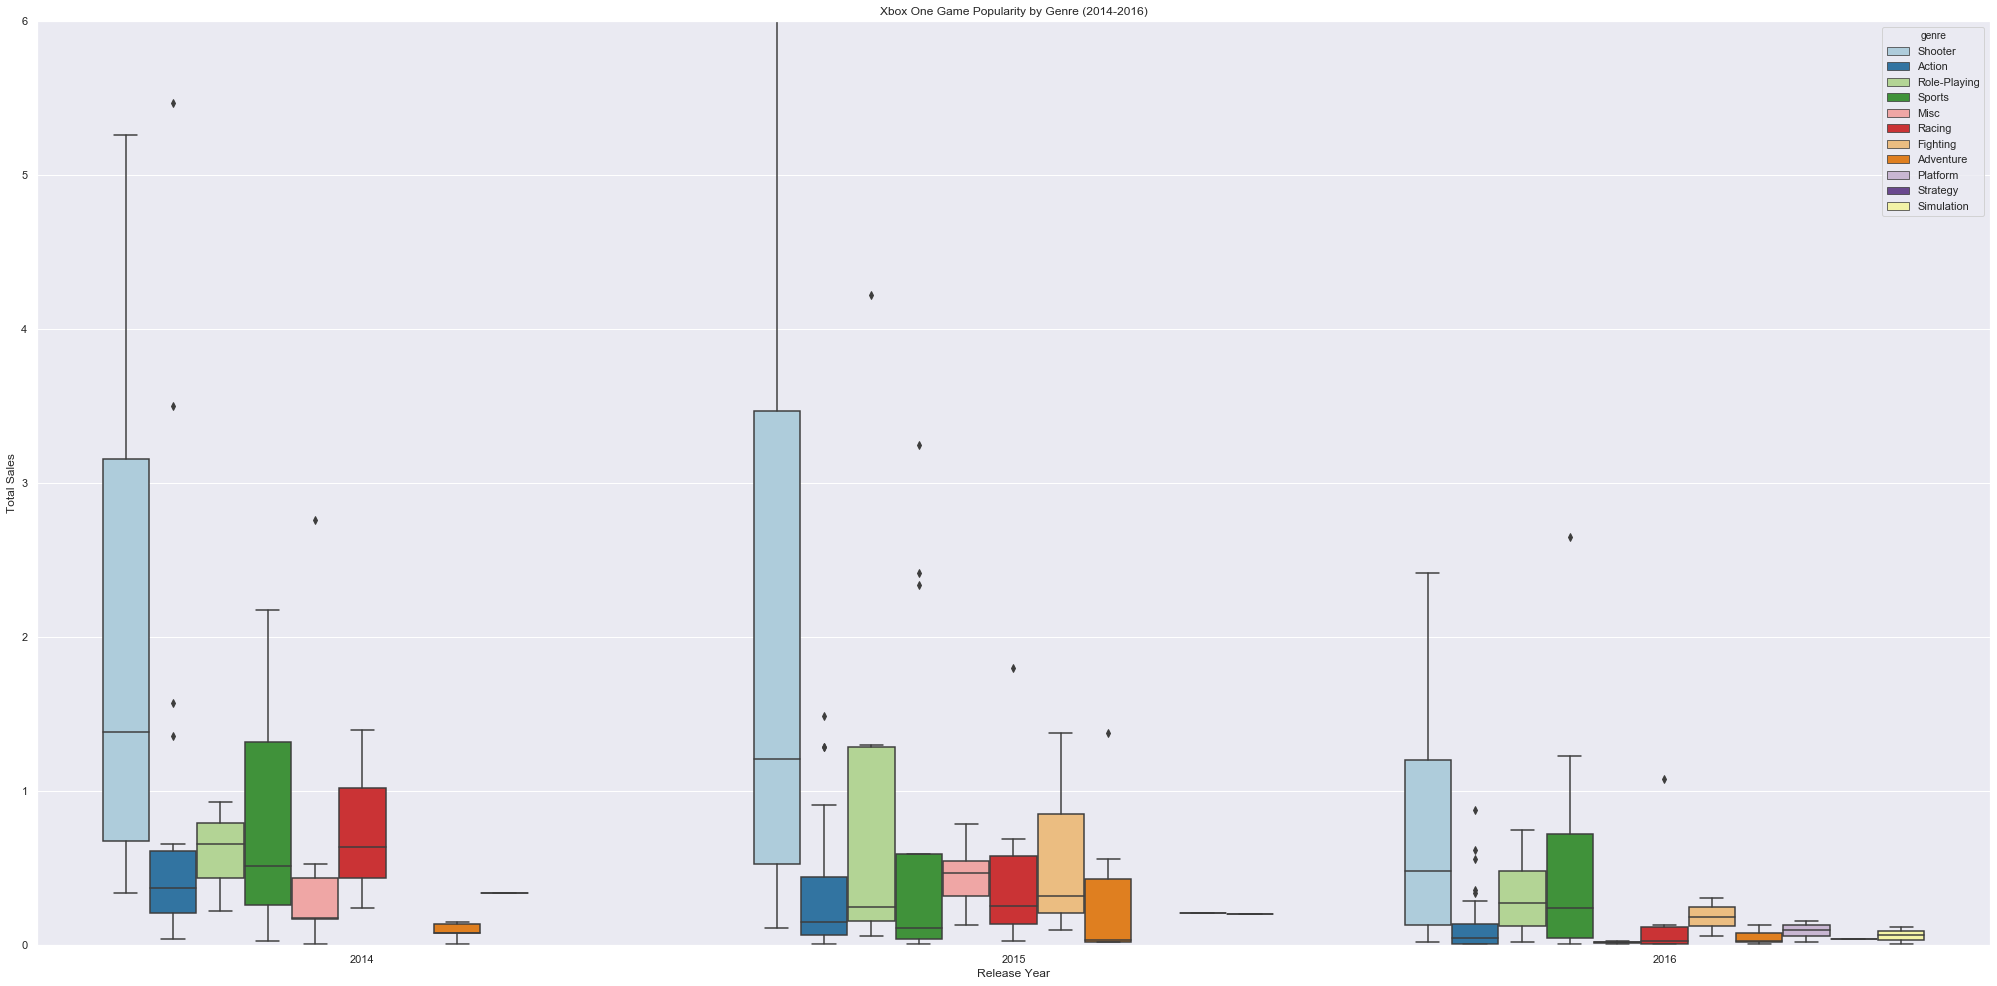

In [85]:
plt.ylim(0, 6)
sns.boxplot(x='year_released', y='sales_total', hue='genre', data=xbox, palette='Paired')
plt.title('Xbox One Game Popularity by Genre (2014-2016)')
plt.ylabel('Total Sales')
plt.xlabel('Release Year')

# Section 3 Conclusions

Overall, we find that critic reviews have very little correlation with the sales of a game. User scores seem to have an even smaller impact on the overall results. However, it's important to recognize that missing scores and 'tbds' from the original data is causing some difficulty with this metric. However, even making the charts without the negative placeholders, it appears there is very little (if any) correlation between ratings and user/critic scores. The two exceptions to this might be PS4 and Xbox One, which both show a slightly positive trend between the two. 

In terms of genre, our boxplots give an interesting look at the distribution between platforms. Clearly, Wii U and 3DS are both a little more limited in their genre distribution. And, looking at these platforms separate from Xbox and PS4, we see these two more powerful consoles skew our data in terms of genre. 

# Section 4. User Profiles by Region

Here we will separate our recent data into regional subsets to get an idea on how region can affect the success of certain games, including whether ratings and genre might vary by platform and region. 

In [86]:
segment_2014.head()

,name,platform,genre,sales_na,sales_eu,sales_jp,sales_other,crit_score,user_score,rating,year_released,sales_total
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,-1,-1,Missing,2015,14.63
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,97,8,M,2014,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,4.35,3.49,3.10,0.74,-1,-1,Missing,2014,11.68
77,FIFA 16,PS4,Sports,1.12,6.12,0.06,1.28,82,4,E,2015,8.58
87,Star Wars Battlefront (2015),PS4,Shooter,2.99,3.49,0.22,1.28,-1,-1,Missing,2015,7.98


In [87]:
countries = pd.pivot_table(segment_2014, index='platform', values=['sales_na', 'sales_eu', 
                                                                   'sales_jp', 'sales_other'], aggfunc=['mean', 'sum'])

In [88]:
countries

mean                                      sum                    \
          sales_eu  sales_jp  sales_na sales_other sales_eu sales_jp sales_na   
platform                                                                        
3DS       0.076038  0.208679  0.106792    0.017358    16.12    44.24    22.64   
PC        0.119868  0.000000  0.047961    0.012434    18.22     0.00     7.29   
PS3       0.116621  0.051233  0.100685    0.042785    25.54    11.22    22.05   
PS4       0.345851  0.039947  0.262261    0.118298   130.04    15.02    98.61   
PSP       0.000000  0.027692  0.000000    0.000000     0.00     0.36     0.00   
PSV       0.011966  0.049288  0.008542    0.006136     3.53    14.54     2.52   
Wii       0.235455  0.000000  0.189091    0.036364     2.59     0.00     2.08   
WiiU      0.180137  0.100137  0.265205    0.043288    13.15     7.31    19.36   
X360      0.139550  0.000721  0.254955    0.039189    15.49     0.08    28.30   
XOne      0.202851  0.001404  0.356447    0.054912    46.25     0.32    81.27   

                      
         sales_other  
platform              
3DS             3.68  
PC              1.89  
PS3             9.37  
PS4            44.48  
PSP             0.00  
PSV             1.81  
Wii             0.40  
WiiU            3.16  
X360            4.35  
XOne           12.52

This single pivot table aggregates data from 10 platforms 2014-2016 and allows us a clear view of the average and total sales among regions. With that in mind, we get a clearer picture of which consoles perform best in which region. With this, we can easily look at the table and pull the data we need. Namely, our top 5 consoles by region.

Before we do, it's important to recall that both PS3 and Xbox360 have announced they have ceased production on new games by 2015 and 2016, respectively. This means, while they may be in the running in terms of shear volume, we know new games are no longer being produced, which should lead to a sharp fall in their sales (and if we want new games, it will mean no sales are possible). With that in mind, we'll automate our leaders based on total sales.

In [89]:
countries.columns = ['avg_sales_eu', 'avg_sales_jp', 'avg_sales_na', 'avg_sales_other', 
                     'total_sales_eu', 'total_sales_jp', 'total_sales_na', 'total_sales_other']

In [90]:
top5_eu = countries.sort_values(by='total_sales_eu', ascending=False)

In [91]:
top5_jp = countries.sort_values(by='total_sales_jp', ascending=False)

In [92]:
top5_na = countries.sort_values(by='total_sales_na', ascending=False)

In [93]:
top5_other = countries.sort_values(by='total_sales_other', ascending=False)

In [94]:
top5_eu.head()

,avg_sales_eu,avg_sales_jp,avg_sales_na,avg_sales_other,total_sales_eu,total_sales_jp,total_sales_na,total_sales_other
platform,,,,,,,,
PS4,0.345851,0.039947,0.262261,0.118298,130.04,15.02,98.61,44.48
XOne,0.202851,0.001404,0.356447,0.054912,46.25,0.32,81.27,12.52
PS3,0.116621,0.051233,0.100685,0.042785,25.54,11.22,22.05,9.37
PC,0.119868,0.000000,0.047961,0.012434,18.22,0.00,7.29,1.89
3DS,0.076038,0.208679,0.106792,0.017358,16.12,44.24,22.64,3.68


In [95]:
top5_jp.head()

,avg_sales_eu,avg_sales_jp,avg_sales_na,avg_sales_other,total_sales_eu,total_sales_jp,total_sales_na,total_sales_other
platform,,,,,,,,
3DS,0.076038,0.208679,0.106792,0.017358,16.12,44.24,22.64,3.68
PS4,0.345851,0.039947,0.262261,0.118298,130.04,15.02,98.61,44.48
PSV,0.011966,0.049288,0.008542,0.006136,3.53,14.54,2.52,1.81
PS3,0.116621,0.051233,0.100685,0.042785,25.54,11.22,22.05,9.37
WiiU,0.180137,0.100137,0.265205,0.043288,13.15,7.31,19.36,3.16


In [96]:
top5_na.head()

,avg_sales_eu,avg_sales_jp,avg_sales_na,avg_sales_other,total_sales_eu,total_sales_jp,total_sales_na,total_sales_other
platform,,,,,,,,
PS4,0.345851,0.039947,0.262261,0.118298,130.04,15.02,98.61,44.48
XOne,0.202851,0.001404,0.356447,0.054912,46.25,0.32,81.27,12.52
X360,0.139550,0.000721,0.254955,0.039189,15.49,0.08,28.30,4.35
3DS,0.076038,0.208679,0.106792,0.017358,16.12,44.24,22.64,3.68
PS3,0.116621,0.051233,0.100685,0.042785,25.54,11.22,22.05,9.37


In [97]:
top5_other.head()

,avg_sales_eu,avg_sales_jp,avg_sales_na,avg_sales_other,total_sales_eu,total_sales_jp,total_sales_na,total_sales_other
platform,,,,,,,,
PS4,0.345851,0.039947,0.262261,0.118298,130.04,15.02,98.61,44.48
XOne,0.202851,0.001404,0.356447,0.054912,46.25,0.32,81.27,12.52
PS3,0.116621,0.051233,0.100685,0.042785,25.54,11.22,22.05,9.37
X360,0.139550,0.000721,0.254955,0.039189,15.49,0.08,28.30,4.35
3DS,0.076038,0.208679,0.106792,0.017358,16.12,44.24,22.64,3.68


These filters on our pivot table allow us to quickly see which are the top 5 by each 4 regional category.
Europe: 1)PS4 2)Xbox One 3)PS3 4)PC 5)3DS 
Japan: 1)3DS 2)PS4 3)PSV 4)PS3 5)Wii U
North America: 1)PS4 2)Xbox One 3)Xbox 360 4)3DS 5)PS3
Other: 1)PS4 2)Xbox One 3)PS3 4)Xbox 360 5)3DS

Again, we note that Xbox 360 and PS3 have ceased production of new titles, so should not be given as much weight, despite their strong showings. Further, we note that PS4 tends to be the dominant systems across the board, with the JP region being the only one that deviates from this -quite substantially too. We see the 3DS in Japan has sold nearly 3x the volume of 3DS games vs PS4, which is their second best selling platform. 

In [98]:
genres = pd.pivot_table(segment_2014, index='genre', 
                        values=['sales_na', 'sales_eu', 'sales_jp', 
                                'sales_other', 'sales_total'], aggfunc=['mean', 'sum'])

In [99]:
genres.columns = ['avg_sales_eu', 'avg_sales_jp', 'avg_sales_na', 'avg_sales_other', 'avg_sales_global', 
                  'total_sales_eu', 'total_sales_jp', 'total_sales_na', 'total_sales_other', 'total_sales_global']

In [100]:
genres

,avg_sales_eu,avg_sales_jp,avg_sales_na,avg_sales_other,avg_sales_global,total_sales_eu,total_sales_jp,total_sales_na,total_sales_other,total_sales_global
genre,,,,,,,,,,
Action,0.120855,0.047710,0.117081,0.036468,0.322113,74.93,29.58,72.59,22.61,199.71
Adventure,0.035081,0.019459,0.030486,0.009838,0.094865,6.49,3.60,5.64,1.82,17.55
Fighting,0.111500,0.106167,0.207167,0.045500,0.470333,6.69,6.37,12.43,2.73,28.22
Misc,0.113805,0.049646,0.133186,0.035664,0.332301,12.86,5.61,15.05,4.03,37.55
Platform,0.178947,0.070789,0.178684,0.047632,0.476053,6.80,2.69,6.79,1.81,18.09
Puzzle,0.037143,0.066429,0.046429,0.007857,0.157857,0.52,0.93,0.65,0.11,2.21
Racing,0.204783,0.025507,0.126667,0.041884,0.398841,14.13,1.76,8.74,2.89,27.52
Role-Playing,0.127466,0.140995,0.151448,0.039095,0.459005,28.17,31.16,33.47,8.64,101.44
Shooter,0.511875,0.038047,0.617344,0.168203,1.335469,65.52,4.87,79.02,21.53,170.94


In [101]:
genres.sort_values(by='total_sales_global', ascending=False)

,avg_sales_eu,avg_sales_jp,avg_sales_na,avg_sales_other,avg_sales_global,total_sales_eu,total_sales_jp,total_sales_na,total_sales_other,total_sales_global
genre,,,,,,,,,,
Action,0.120855,0.047710,0.117081,0.036468,0.322113,74.93,29.58,72.59,22.61,199.71
Shooter,0.511875,0.038047,0.617344,0.168203,1.335469,65.52,4.87,79.02,21.53,170.94
Sports,0.284037,0.020248,0.286522,0.089193,0.680000,45.73,3.26,46.13,14.36,109.48
Role-Playing,0.127466,0.140995,0.151448,0.039095,0.459005,28.17,31.16,33.47,8.64,101.44
Misc,0.113805,0.049646,0.133186,0.035664,0.332301,12.86,5.61,15.05,4.03,37.55
Fighting,0.111500,0.106167,0.207167,0.045500,0.470333,6.69,6.37,12.43,2.73,28.22
Racing,0.204783,0.025507,0.126667,0.041884,0.398841,14.13,1.76,8.74,2.89,27.52
Platform,0.178947,0.070789,0.178684,0.047632,0.476053,6.80,2.69,6.79,1.81,18.09
Adventure,0.035081,0.019459,0.030486,0.009838,0.094865,6.49,3.60,5.64,1.82,17.55


This pivot table allows us to narrow down recent data by genre. In this case, we can even compare the genres across region. But, for our purposes, we mainly focused on the global data to see how each genre is received overall. 

This way, we find our most popular genres over the past few years are 1)Action 2)Shooter 3)Sports 4)Role-Playing 5)Misc

At this point, we could also look at how genre ties in across platform, but for our assignment we next explore ESRB ratings and compare how those can impact different regions. 

In [102]:
segment_2014.columns

Index(['name', 'platform', 'genre', 'sales_na', 'sales_eu', 'sales_jp',
       'sales_other', 'crit_score', 'user_score', 'rating', 'year_released',
       'sales_total'],
      dtype='object')

In [103]:
eu_esrb = segment_2014[['platform', 'sales_eu', 'rating']]

In [104]:
jp_esrb = segment_2014[['platform', 'sales_jp', 'rating']]

In [105]:
na_esrb = segment_2014[['platform', 'sales_na', 'rating']]

In [106]:
other_esrb = segment_2014[['platform', 'sales_other', 'rating']]

In [107]:
global_esrb = segment_2014[['platform', 'sales_total', 'rating']]

Text(0.5, 0, 'Platform')

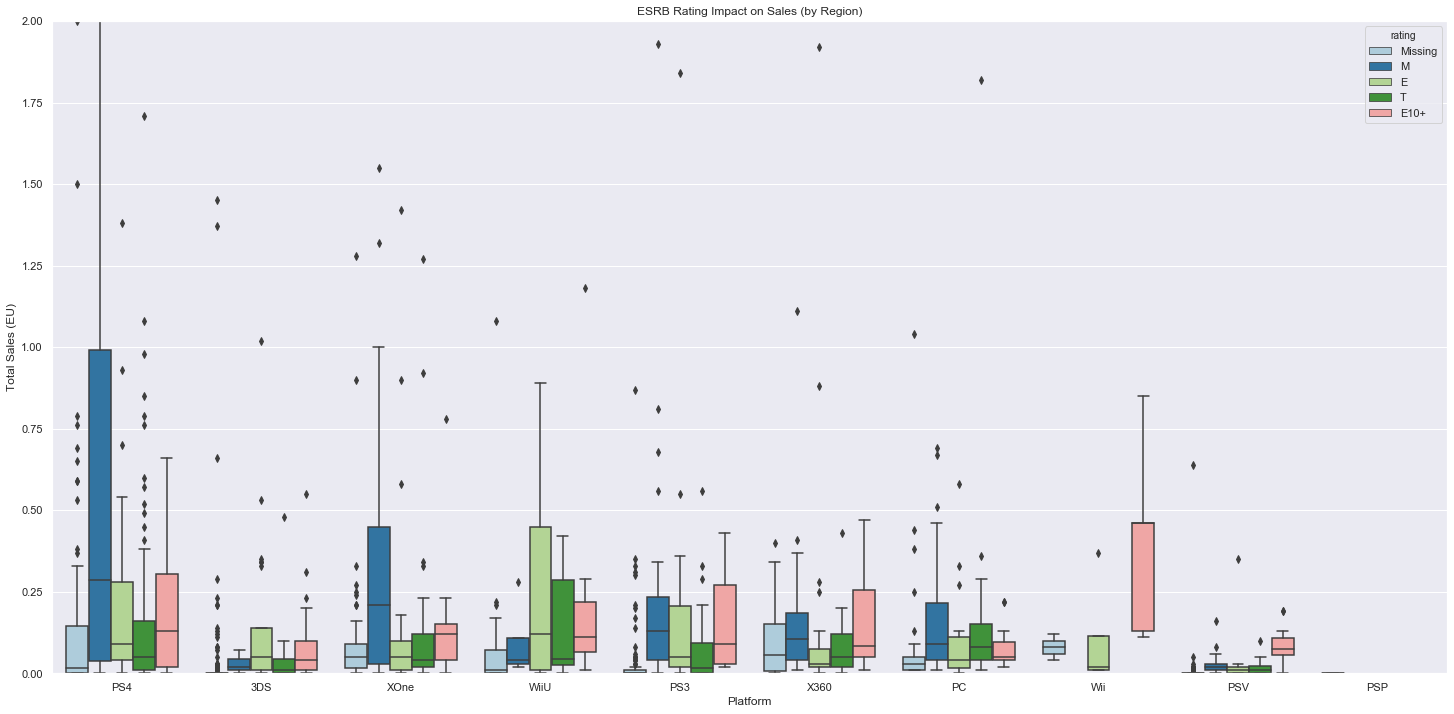

In [108]:
plt.rcParams["figure.figsize"] = (25,12)
plt.ylim(0, 2)
sns.boxplot(x='platform', y='sales_eu', hue='rating', data=eu_esrb, palette='Paired')
plt.title('ESRB Rating Impact on Sales (by Region)')
plt.ylabel('Total Sales (EU)')
plt.xlabel('Platform')

Here I'm looking for a visual of how game ratings affect sales. I kept different platforms in view so it was easier to see all the data at once. This also helps reveal some platforms that might not be worth exploring further for our analysis. Specifically, we see that in the EU, PS4 definitely favors M ratings, as does Xbox. PS3 and Xbox360 were more balanced in their ratings. WiiU had a leaning towards games with E, and the original Wii leaned towards E and E10+. PSV and PSP both had very low sales for this time period regardless of genre. But, if we do look more at PSV, we see E10+ is the only rating that has much of a consistent impact. 

With this in mind, we have an idea of how the EU is distributed visually. From there, I can simply calculate the mean to get a more concrete number on the average sales for each console as a whole. 

In [109]:
eu_m = eu_esrb[eu_esrb['rating'] == 'M']
eu_e = eu_esrb[eu_esrb['rating'] == 'E']
eu_t = eu_esrb[eu_esrb['rating'] == 'T']
eu_e10 = eu_esrb[eu_esrb['rating'] == 'E10+']

In [110]:
print(eu_m['sales_eu'].mean())

0.35221804511278193


In [111]:
print(eu_e['sales_eu'].mean())

0.2651141552511418


In [112]:
print(eu_t['sales_eu'].mean())

0.1257195571955718


In [113]:
print(eu_e10['sales_eu'].mean())

0.14140540540540542


Text(0.5, 0, 'Platform')

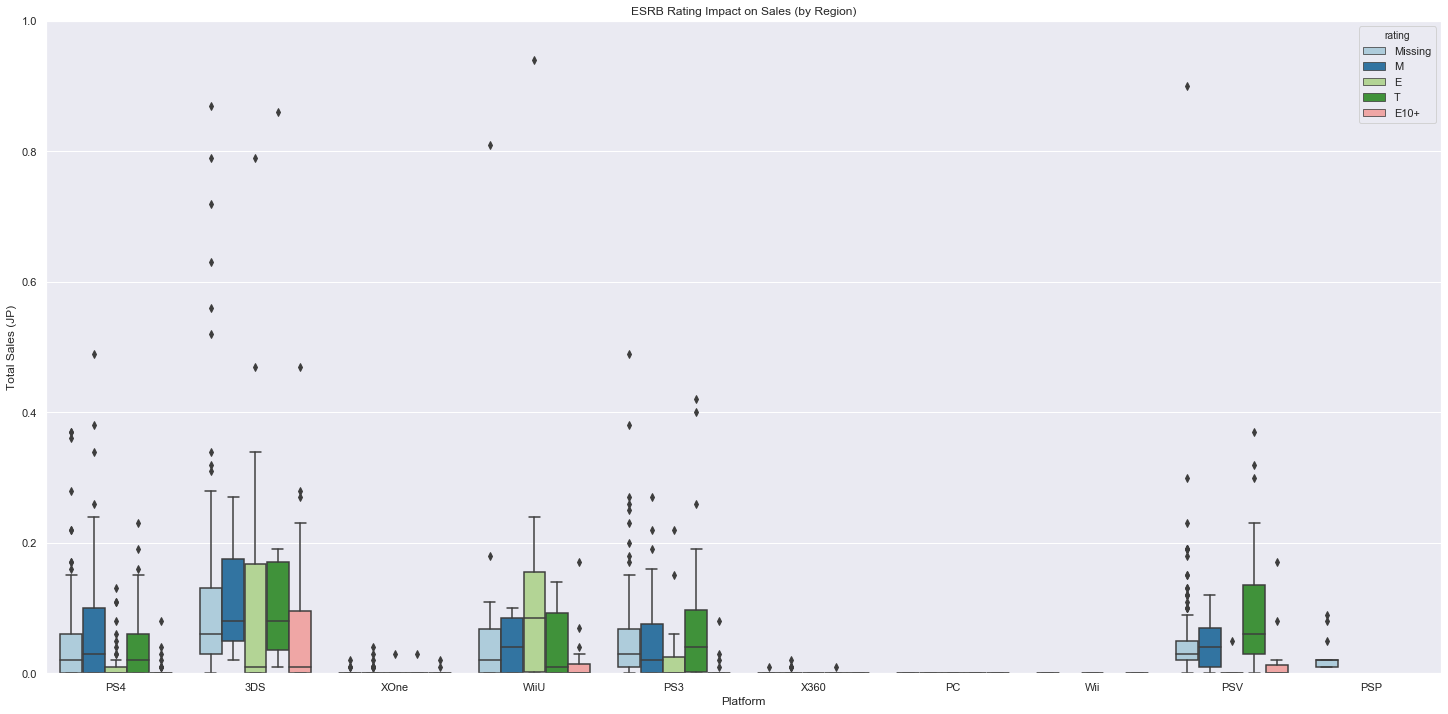

In [114]:
plt.ylim(0, 1)
sns.boxplot(x='platform', y='sales_jp', hue='rating', data=jp_esrb, palette='Paired')
plt.title('ESRB Rating Impact on Sales (by Region)')
plt.ylabel('Total Sales (JP)')
plt.xlabel('Platform')

Following the same pattern as I did for the EU, we immediately see some interesting differences in the JP region. For starters, the PSV is a big contender this time, at least in terms of games with T and M ratings (in that order). Next, the PS3 has a more clear distribution around T-rated games, but also maintains a spread across M and E10+. The WiiU, while it does seem to favor games rated E, also has a fair distribution for a variety of categories. 

Interestingly enough, the Xbox One's major distribution is very small in JP, showing it's much less popular in this region. 3DS seems to be the most popular, on average. The highest numbers look to come from E, but the everages of both M and T-rated games definitely stick a bit higher. Overall, it seems all genres are more popular on the 3DS. Finally, the PS4 seems distributed between M, T, and the Missing values. M definitely appears to be the winner in this genre. 

With this in mind, we have an idea of how the JP is distributed visually. From there, I can simply calculate the mean to get a more concrete number on the average sales for each console. 

In [115]:
jp_m = jp_esrb[jp_esrb['rating'] == 'M']
jp_e = jp_esrb[jp_esrb['rating'] == 'E']
jp_t = jp_esrb[jp_esrb['rating'] == 'T']
jp_e10 = jp_esrb[jp_esrb['rating'] == 'E10+']

In [116]:
print(jp_m['sales_jp'].mean())

0.030112781954887178


In [117]:
print(jp_e['sales_jp'].mean())

0.040821917808219185


In [118]:
print(jp_t['sales_jp'].mean())

0.05453874538745382


In [119]:
print(jp_e10['sales_jp'].mean())

0.024108108108108095


Text(0.5, 0, 'Platform')

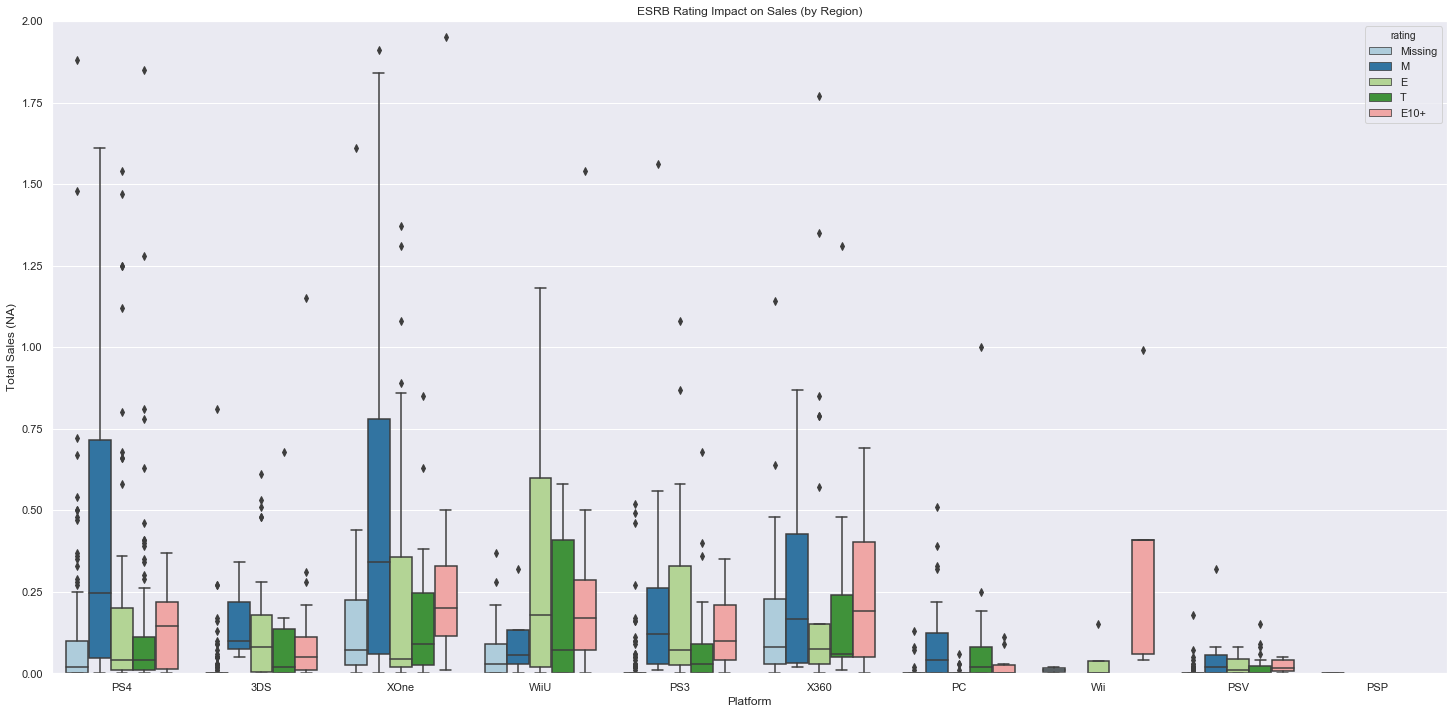

In [120]:
plt.ylim(0, 2)
sns.boxplot(x='platform', y='sales_na', hue='rating', data=na_esrb, palette='Paired')
plt.title('ESRB Rating Impact on Sales (by Region)')
plt.ylabel('Total Sales (NA)')
plt.xlabel('Platform')

Starting from right to left, we explore the NA distribution of genres across platform. First, we see that perhaps the PSP should have been excluded, as there are very few sales in general. Next, we note that M and E-rated games in the PSV seem to perform a cut about the rest, but T has some definite outliers that are more successful than the average distribution of either. The Wii is our next platform, which seems to only be selling E10+ games for the most part, some E-rated games included as well. Similarly, the PC does have some T and M-rated games, but definitely seems to favor those with an M rating on average. 

Xbox 360 is definitely more prominant in the NA region than the previous ones we've explored above. We see both M and E10+ games have the largest distributions and include higher upper quartiles and averages. Still, both  T and E-rated games look to compete with a platform like the PC as well. Alternatively, the PS3 appears more similar to our observations in the EU. Here we find E10+ and T has notable distributions, but E seems to be the clear victor, followed by M, which actually has a slightly higher average. 

WiiU, like in other regions, seems to favor titles with an E rating. However, it's interesting to note that in NA T is clearly the second largest category. Skipping over 3DS momentarily, both the Xbox One and PS4 have relatively similar distributions. M is clearly the best seller on these systems. Xbox tends to have more of a balance between E10+ and T, with E games takes a much larger distribution share overall. PS4, on the other hand, tends to have more E and E10+ games, with T taking a smaller share.

Finally, while the tops and averages differ, it seems the overall size of the main distribution in 3DS are similar across genre. M may have slightly higher shares, but in terms of volume and accounting for outliers, one could argue E-rated games are most likely to be successful in NA on the 3DS.

With this in mind, we have an idea of how the NA region is distributed visually. One thing to note here: regardless of genre and platform, it seems NA has a considerably larger stake in game sales overall, which seems to follow some of our earlier observations. From there, I can simply calculate the mean to get a more concrete number on the average sales for each console. 

In [121]:
na_m = na_esrb[na_esrb['rating'] == 'M']
na_e = na_esrb[na_esrb['rating'] == 'E']
na_t = na_esrb[na_esrb['rating'] == 'T']
na_e10 = na_esrb[na_esrb['rating'] == 'E10+']

In [122]:
print(na_m['sales_na'].mean())

0.3627067669172937


In [123]:
print(na_e['sales_na'].mean())

0.231689497716895


In [124]:
print(na_t['sales_na'].mean())

0.1437269372693728


In [125]:
print(na_e10['sales_na'].mean())

0.1796216216216216


Text(0.5, 0, 'Platform')

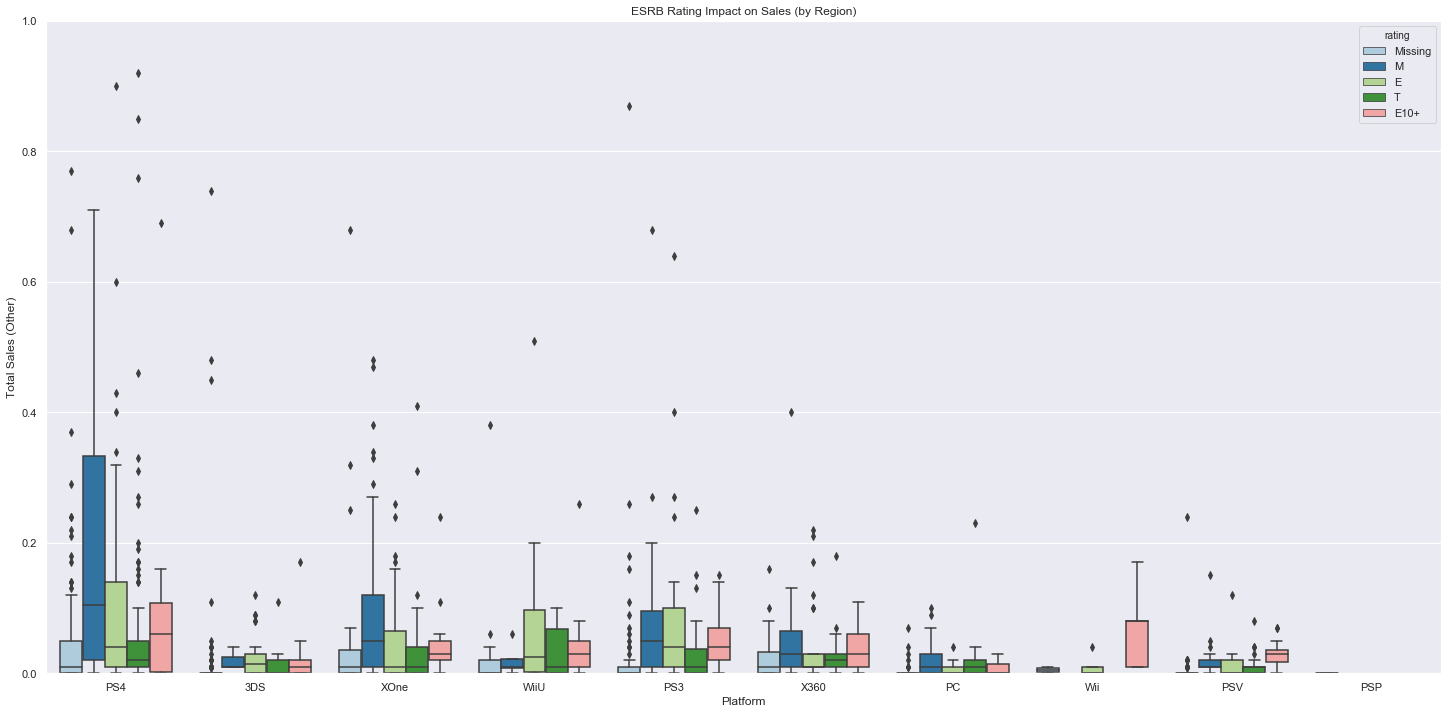

In [126]:
plt.ylim(0, 1)
sns.boxplot(x='platform', y='sales_other', hue='rating', data=other_esrb, palette='Paired')
plt.title('ESRB Rating Impact on Sales (by Region)')
plt.ylabel('Total Sales (Other)')
plt.xlabel('Platform')

Looking at other regions, we see some interesting trends. Much of these align with the other regions we explored above, such as an overall abysmal showing for PSP, regardless of genre. PSV also tends to be low, and Wii seems limited only to E and E10+ games. PC games tend to stick to the lower end of sales too, with M-rated games being the only ones that seem to perform. 

The older generation of Xbox and Playstation (X360 and PS3) show in these other regions that the PS3 is definitely favored. But, they tend to follow a leaning towards M (and E on the PS3). The WiiU, as we might expect, favors E-rated games, but the next largest distribution is in T games. However, it's important to note that the average of this distribution, while smaller overall, is in E10+. This could be an instance where more games were released in T, artifically increasing the distribution size. 

Xbox one is clearly less popular outside the EU and NA regions. But, as we saw above, M-rated games seem the most popular. In these regions, those games rated E follow, then there's a battle between T and E10+. The 3DS shows relatively balanced game sales across genre, all sticking to the low end. Finally, the PS4 definitely shows a leaning towards M-rated games for these other regions. And, overall those games sell much better than any other platform. One interesting note here is the T-rated games on PS4. We see many games lying above the main distribution rated T. So, while E10+ and E-rated games may perform better in their main distribution, a well-received T-rated game may even compete with M ratings on the PS4. 

With this in mind, we have an idea of how the Other regions are distributed visually. From there, I can simply calculate the mean to get a more concrete number on the average sales for each console.

In [127]:
other_m = other_esrb[other_esrb['rating'] == 'M']
other_e = other_esrb[other_esrb['rating'] == 'E']
other_t = other_esrb[other_esrb['rating'] == 'T']
other_e10 = other_esrb[other_esrb['rating'] == 'E10+']

In [128]:
print(other_m['sales_other'].mean())

0.10793233082706798


In [129]:
print(other_e['sales_other'].mean())

0.07027397260273957


In [130]:
print(other_t['sales_other'].mean())

0.04180811808118065


In [131]:
print(other_e10['sales_other'].mean())

0.042324324324324245


# Section 4 Overall Conclusions

Here we looked at a variety of different variables in terms of video game popularity across the globe. While we made some notes along the way, it's important to recognize the JP region varies the most from the rest of the world. Without that important market, it would change the overall picture of games in recent years.

Among those, we see ESRB ratings predominantly favor a Mature rating in terms of large sales volume. However, depending on where you go the second place may vary. Additionally, the JP region shows games rated Teen are the most lucrative. 

# Section 5. Hypothesis Testing

Here we'll test two main hyptheses. First, we want to know whether Average user ratings of the Xbox One and PC platforms are the same. Our null hypothesis in this case is simple: there is no different between average ratings. Our alternative is that, between platforms, we will see a signifiant different from Xbox One vs. PC.

Our second hypothesis is: Average user ratings for the Action and Sports genres are different. In this case, our null hypothesis is that there is no difference between the average user ratings. However, our alternative is that there is, in fact, a significant different between the user ratings for Action and Sports genres. 

In both these tests, we will stick with data from 2014 and beyond. The reason for this is that these ratings are most important to our future plans. 

In [132]:
xbox_seg = segment_2014[segment_2014['platform'] == 'XOne']

In [133]:
pc_seg = segment_2014[segment_2014['platform'] == 'PC']

In [134]:
xbox_user_score = xbox_seg['user_score'].tolist()

In [135]:
pc_user_score = pc_seg['user_score'].tolist()

In [136]:
np.var(xbox_user_score)

12.229455216989843

In [137]:
np.var(pc_user_score)

9.986842105263158

In [138]:
st.ttest_ind(xbox_user_score, pc_user_score, equal_var=False)

Ttest_indResult(statistic=-0.9875223050538987, pvalue=0.3240788287431601)

In [139]:
st.ttest_ind(xbox_user_score, pc_user_score)

Ttest_indResult(statistic=-0.967943789516041, pvalue=0.3336913417060722)

In [140]:
sports_seg = segment_2014[segment_2014['genre'] == 'Sports']

In [141]:
action_seg = segment_2014[segment_2014['genre'] == 'Action']

In [142]:
sports_user_score = sports_seg['user_score'].tolist()

In [143]:
action_user_score = action_seg['user_score'].tolist()

In [144]:
np.var(sports_user_score)

9.0185563828556

In [145]:
np.var(action_user_score)

14.727273673257024

In [146]:
st.ttest_ind(sports_user_score, action_user_score, equal_var=False)

Ttest_indResult(statistic=3.8797321152226867, pvalue=0.00012780288144764984)

# Section 5 Conclusions

In our first hypothesis test, we segmented our 2014 and beyond data to include just Xbox and PC, respectively. We then took the user scores from this timem period for each platform and compared them, figuring the variance was different and calculating them independently. Just to be extra cautious, I also ran including an equal variance, since the variance scores are closer than expected. In both cases, my t-test shows about a 23% chance that the samples can randomly vary as they do here. In other words, I cannot reject the null hypothesis and conclude ratings from PC to Xbox are similar. 

For our second hypothesis test, we see a drastically different picture, which raises some questions about other genres as well. In this case, we reject the null hypothesis in favor of the alternative. This could warrant some further investigation, as we clearly see a different between sports and action games when it comes to user ratings. 

# Section 6. Final Conclusions

Overall, we explored quite a lot with this data. We got to see how trends have changed in recent years in terms of genre preference. We also get a clear look at how different regions can impact games sales. Namely, we note in this category that the JP region differences significantly from the rest of the world. Similarly, we find that year-to-year specific titles can greatly skew data. 

To clarify, throughout the entire study of the data we find that extraordinarily successful games are common enough that they cannot be ignored. However, we stuck primarily to the main distrubtions (ignoring these outliers) in our analysis. This way, we could get a picture of what genres and platforms our best. 

Going into 2017, I would definitely recommend most attention stays on the Xbox One and the PS4. In terms of recent data, these two platforms are continually growing and tend to have the largest share of "breakout" games -i.e. games that are extraordinarily successful. This leads me to believe that more powerful and resource-intensive games are going to be more lucrative in the near future. For this reason, and the growing popularity of the PC as a gaming platform, I would recommend PS4, Xbox One, and PC are the top three systems to monitor going into 2017. 